# Connectivety map: L1000 platform (phase I)


1.5 million experimets:<br> ~20K perturbation,4.5K knockdown and 3K over-expressions in ~100 cell-lines in triplicates <br> Not all cells are treated with all conditions

 The data is available on GEO  under submission number **GSE92742**

### *Load packages*

In [1]:
import cmapPy
import h5py
import pandas as pd
import numpy as np
import cmapPy.pandasGEXpress.parse_gct as pg
from cmapPy.pandasGEXpress.parse import parse
import pkg_resources

### *Setup file system*

Download these files from GEO, and <span style="color:red"> change the directory </span> to the one contains the files

In [2]:
import os
os.chdir("/home/ros/Desktop/cMAP_data/cMAP_GSE92742/") #your directory here


metadata_file="GSE92742_Broad_LINCS_sig_info.txt"
gene_data_file="GSE92742_Broad_LINCS_gene_info.txt"
data_file_lvl5="GSE92742_Broad_LINCS_Level5_COMPZ.MODZ_n473647x12328.gctx"

Fc_RNA_cutoff=0.8
L1000_cutoff=0.25


## Loading data

*Use metadata for level5 from the study. It means it is normalized, z-score and averaged over 3 samples per experiment.*

In [3]:
sig_info = pd.read_csv(metadata_file, sep="\t")

/home/ros/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
sig_info


,sig_id,pert_id,pert_iname,pert_type,cell_id,pert_dose,pert_dose_unit,pert_idose,pert_time,pert_time_unit,pert_itime,distil_id
0,AML001_CD34_24H:A05,DMSO,DMSO,ctl_vehicle,CD34,0.1,%,0.1 %,24,h,24 h,AML001_CD34_24H_X1_F1B10:A05
1,AML001_CD34_24H:A06,DMSO,DMSO,ctl_vehicle,CD34,0.1,%,0.1 %,24,h,24 h,AML001_CD34_24H_X3_F1B10:A06
2,AML001_CD34_24H:B05,DMSO,DMSO,ctl_vehicle,CD34,0.1,%,0.1 %,24,h,24 h,AML001_CD34_24H_X1_F1B10:B05|AML001_CD34_24H_X...
3,AML001_CD34_24H:B06,DMSO,DMSO,ctl_vehicle,CD34,0.1,%,0.1 %,24,h,24 h,AML001_CD34_24H_X3_F1B10:B06
4,AML001_CD34_24H:BRD-A03772856:0.37037,BRD-A03772856,BRD-A03772856,trt_cp,CD34,0.37037,µM,500 nM,24,h,24 h,AML001_CD34_24H_X1_F1B10:J04|AML001_CD34_24H_X...
...,...,...,...,...,...,...,...,...,...,...,...,...
473642,TAK004_U2OS_96H:TRCN0000370007:1,TRCN0000370007,WWTR1,trt_sh,U2OS,1,µL,1 µL,96,h,96 h,TAK004_U2OS_96H_X1_B6_DUO52HI53LO:J10|TAK004_U...
473643,TAK004_U2OS_96H:TRCN0000370678:1,TRCN0000370678,GRB10,trt_sh,U2OS,1,µL,1 µL,96,h,96 h,TAK004_U2OS_96H_X1_B6_DUO52HI53LO:E02|TAK004_U...
473644,TAK004_U2OS_96H:TRCN0000370697:1,TRCN0000370697,GRB10,trt_sh,U2OS,1,µL,1 µL,96,h,96 h,TAK004_U2OS_96H_X1_B6_DUO52HI53LO:A18|TAK004_U...
473645,TAK004_U2OS_96H:TRCN0000370751:1,TRCN0000370751,GRB10,trt_sh,U2OS,1,µL,1 µL,96,h,96 h,TAK004_U2OS_96H_X1_B6_DUO52HI53LO:I12|TAK004_U...


In [5]:
# print list of cell-lines
(sig_info["cell_id"].value_counts()).index

Index(['VCAP', 'MCF7', 'PC3', 'A549', 'A375', 'HT29', 'HA1E', 'HCC515',
       'HEPG2', 'NPC', 'ASC', 'NEU', 'SKB', 'PHH', 'SKL', 'BT20', 'MDAMB231',
       'HS578T', 'MCF10A', 'SKBR3', 'HEK293T', 'FIBRNPC', 'SW480', 'HEKTE',
       'NKDBA', 'THP1', 'NOMO1', 'U937', 'JURKAT', 'HUH7', 'SHSY5Y', 'SKM1',
       'SKMEL1', 'A673', 'RMUGS', 'CORL23', 'HCC15', 'HEC108', 'SNUC4',
       'HCT116', 'EFO27', 'NCIH2073', 'SW620', 'NCIH596', 'RKO', 'LOVO', 'OV7',
       'SNU1040', 'AGS', 'MDST8', 'JHUEM2', 'H1299', 'SKMEL28', 'TYKNU',
       'SW948', 'HL60', 'DV90', 'RMGI', 'NCIH508', 'SNGM', 'PL21', 'SKLU1',
       'WSUDLCL2', 'COV644', 'CL34', 'HT115', 'T3M10', 'NCIH1694', 'NCIH1836',
       'SNUC5', 'U2OS', 'CD34', 'U266', 'MCH58', 'HS27A', 'NCIH716'],
      dtype='object')

In [6]:
# print list of perturbation
for (x) in sig_info["pert_iname"].value_counts().index: print(x)

DMSO
EMPTY_VECTOR
GFP
vorinostat
lacZ
trichostatin-a
wortmannin
geldanamycin
LUCIFERASE
RFP
UnTrt
sirolimus
ERBB3
KRAS
LY-294002
JUN
curcumin
CFLAR
MET
BAD
GSK3A
MYC
estradiol
PARP2
EGFR
fulvestrant
tozasertib
PTK2
IGF1R
genistein
EGF
sulforaphane
tamoxifen
BRAF
PTPN12
ABL1
pgw
PHKG2
AKT1
ERG
raloxifene
STK33
withaferin-a
CHEK2
CDK2
PAX8
tretinoin
dexamethasone
MAPK9
CRKL
thioridazine
MAPK13
CDK6
IGF1
DDR1
tanespimycin
BRD-K98948170
JAK1
CDKN1A
RPS6KA1
CSK
MELK
CHEK1
troglitazone
YES1
RET
PPARG
IL4
olaparib
PIK3CB
parthenolide
EZH2
ROCK1
GSK3B
ATM
TGFBR2
panobinostat
resveratrol
MTOR
AKT3
barasertib-HQPA
EIF2AK3
selumetinib
NRAS
TL-HRAS-61
ERBB4
CSNK1E
EXT1
PIK3C2A
TNF
MAP2K4
TBK1
PIK3R1
estriol
E2F1
INS
AKT2
SFN
gemcitabine
PDPK1
KIF11
AURKA
PRKCZ
IL6
MST1R
IFNG
PRKACA
WT1
INSR
doxorubicin
tert-butylhydroquinone
LMNB2
LDHA
BRD-K93367411
RPS6KA3
FLT3
SGK1
IGF2
BTK
pifithrin-mu
LYN
PGK1
manumycin-a
AKR1C2
HDAC1
NVP-AUY922
SRSF2
veliparib
GAS6
PF-04217903
THBS1
MAPK14
BCL2
cyclosporin-a


PAK2
NCOA4
CREB3L1
PVR
CDT1
RAN
tubocurarine
GPR107
NOV
RNF123
NR2C2
ZBTB26
ZNF8
GLTSCR1
PDLIM1
ILF3
KIAA0528
PTS
BCL3
alvespimycin
PUS10
ZNF692
TFE3
SLC25A28
PCNA
benzonatate
TBC1D15
SLC25A10
AKAP11
CLPTM1
NR1D2
biperiden
MPHOSPH9
TRADD
MCCC1
SAT1
MAS1L
POLA1
TNKS2
GSDMB
ABCA3
TRAF4
SMURF1
CRCP
STAM
YWHAZ
GCH1
ATP6V0A1
KYNU
EIF2B5
CAMK2G
TBX20
PIP4K2C
ID1
BTBD3
CDH1
SIK3
ZNF581
ARPC3
DLX3
LTBR
ABCG2
POU2F1
TUBB3
RAB5A
POLR3C
EPHB2
S100A11
ZNF114
penfluridol
ANPEP
GNAI3
MAPKAP1
OTX2
ELK3
HMGN3
VN1R4
ATF3
ARHGEF7
UTS2R
RERG
OR52B2
HLA-DRA
RARRES3
ZNF519
DTYMK
PPARGC1A
ANXA2
CCBL1
MLL3
OTX1
CTGF
MDH2
PREP
GBA
ZNF583
ZNF689
MDM4
ST13
APOC2
PPM1B
GTF2F2
EMD
GAMT
LARS2
IL2RB
CHIC2
POR
APOBEC3H
CLK4
ZBTB20
ESRRA
HLA-DRB3
TFDP2
TIMP4
CYC1
IFI30
GABPB2
GCLM
PRKX
LARS
HSD17B4
erythromycin
EFNB2
CYP3A5
VIM
PPP2CB
SLC30A2
PSMA5
TOX2
ARPC1A
OPN5
CDC25C
JAZF1
BLVRB
XPR1
MRGPRX3
TLR2
PKN1
ETV5
RPS15A
alitretinoin
HMMR
ASF1B
PIAS1
A2M
vinpocetine
CERS3
GCDH
ASF1A
indirubin
WFDC2
ING2
B4GALT3
RASD1
CY

BRD-K00551481
SA-1939079
BRD-A01960364
BRD-K52678950
givinostat
BRD-K70947604
RAN-03
BRD-K87426499
MW-STK33-2C
BRD-A88504692
MW-A1-6
BRD-K92863101
BRD-A81530502
BRD-K52640952
BRD-K44890999
BRD-K68191033
BRD-K46171503
BRD-A57300602
BRD-K08630646
BRD-K00859168
dolasetron
BRD-K96704748
BRD-K48716658
nikkomycin
BRD-K58070753
ARG-CSC2-23
BRD-K81441552
BRD-K16290432
SA-1922261
BRD-K14328427
BRD-K55612480
cilomilast
MW-A1-2
BRD-K48924007
BRD-K88569143
BRD-K38519699
BRD-K07395346
BRD-K36031023
buthionine-sulfoximine
BRD-K65050353
BRD-K71670746
SEW-05685
BRD-K22828860
BRD-K51731619
andarine
TG-100115
BRD-K14842454
OM-137
BRD-K48204702
BRD-K73155123
ST-022313
BRD-K81313552
BRD-K72429558
danusertib
BRD-K08799950
GPR161
BRD-K45044657
BRD-K94544211
RAN-02
olopatadine
BRD-K24014699
BRD-K63549648
BRD-K89784888
BRD-K08307026
cytochalasin-d
BRD-K75458636
BRD-K51791390
KI-16425
BRD-K78701355
BRD-K30468800
ST-4029487
BRD-K05562558
BRD-K11987803
NAN-190
BRD-A75471153
BRD-A12643502
lofexidine
RS-I-002-6
BR

ATCAGCT
TCAGACA
ACCAGAA
TGTAACA
ACCCTGA
BRD-K85660637
TGCTAGG
TEC
BRD-K82071478
ethylestrenol
BRD-K65455015
BRD-K86191692
SPEG
BRD-K42197878
GAGAAGA
ATCAGAG
BRD-K64523453
EP400
HK3
GSG2
perospirone
polydatin
methandriol
ACACATG
BRD-K15916856
BRD-K64864583
ACCATGA
YL-61
BRD-K82987299
CYLD
CDK18
BRD-K02952507
BRD-K15973523
BRD-K34547533
TGGTACA
BRD-K89185880
BRD-K12676148
BRD-K23644387
LRRK1
honokiol
TTBK2
BRD-K79797751
JL-7-128
ATGAGCT
YL-52
PHKA2
levosulpiride
NPR2
BRD-K15790516
TCTCCAT
MARK1
GTGCAGT
aspirin
acetylcholine
TTTGGAA
AAGCCAA
1-monopalmitin
PANK1
AAGTATG
BRD-K56555032
SA-1457415
BRD-K26626929
BRD-K85592362
TAGCCAG
BRD-K56130969
BRD-K06009608
BRD-K64034190
ATTGACC
colchicine
BRD-K14471942
lofepramine
BRD-K40506152
mestanolone
BRD-K13872703
BRD-K53780220
TTCGAGA
CDK14
BRD-K41571462
TATGATG
ACVR2A
GUCY2C
CAMK2A
westcort
BRD-K04562016
YL-51
III606050
BRD-K63671514
AGCATCA
BRD-K17874705
YL-58
LY-2140023
BRD-K85194284
IRGC
cetraxate
BRD-K75308990
BRD-K73876582
MYCL2
BRD-K35413818

BRD-K03608458
BRD-K81882789
BRD-K33994902
ACAGACG
BRD-K58493165
BRD-K88196769
BRD-A29119732
BRD-K15679280
BRD-K56593673
BRD-K38373457
BRD-K47812430
BRD-K71045429
ACACAGT
BRD-K69014051
BRD-K31749518
BRD-K49988102
BRD-K38571337
BRD-K51181663
BRD-K27475558
TTAGCTA
CCAAAGC
BRD-K38796873
ATGTTGT
BRD-K47070211
AGAAATA
TNP-470
BRD-K96663038
BRD-K97860318
BRD-K47611269
BRD-A86146706
BRD-K90646778
BRD-K06884091
BRD-K73288268
BRD-K45485804
BRD-K14096157
BRD-K56553629
BRD-K74582039
BRD-K42516959
BRD-K81112982
AAGATAT
ATCAACT
BRD-K57280824
ATCAAAC
BRD-K40121369
BRD-K36906780
BRD-K71138839
GCATCTA
1,2,3,4-tetrahydroisoquinoline
BRD-U65466710
CCT036477
BRD-K00689442
BRD-K96834847
BRD-K05323441
ACGGTAA
BRD-K09290524
BRD-K48431409
BRD-K95481773
BRD-K88282487
ATTTGAT
BRD-K34106732
BRD-K04262969
BRD-K03725349
TCAAAGT
BRD-K54756845
CACCTGG
CAGTACA
BRD-K69276764
BRD-K79090110
BRD-K62265198
BRD-K39669696
BRD-K78099132
BRD-K89399567
BRD-K40301427
BRD-K15232561
BRD-K07105437
TGCACAA
BRD-K51961561
BRD-K991691

BRD-K53717189
BRD-K42132006
BRD-K22264435
BRD-K59606716
BRD-K84521734
BRD-K46597784
BRD-K29543879
BRD-K97095445
BRD-K72624437
BRD-K63521663
BRD-K05713002
BRD-K64716493
BRD-K66783461
BRD-K20032161
TAAACTG
BRD-K76073136
BRD-K21400518
BRD-K18722736
BRD-K34607017
BRD-K89000385
BRD-K18981886
BRD-K73642355
CAAAGTG
BRD-K15858225
ACATGTG
TMEM143
BRD-K88197986
BRD-K43955935
BRD-K61148205
BRD-K28698886
BRD-K48254300
BRD-K80579043
TCGCAGA
BRD-K80472040
BRD-K46592487
BRD-K99536165
BRD-K16827660
TAATGTG
ACACTAC
BRD-K93210686
GAAATCC
BRD-K50068201
BRD-K86297549
TGAGTGT
BRD-K09527783
BRD-K04759195
TGCAAGT
BRD-K78268279
BRD-K47950966
BRD-K15886574
TTCAGTC
BRD-K59722258
BRD-K85297392
BRD-K75313893
BRD-K14246967
BRD-K55633328
BRD-K36070105
BRD-K53740124
TTCTCTG
BRD-K55340188
BRD-K37991590
BRD-K16778485
TGGTTAA
BRD-K83003953
BRD-K70727050
BRD-K93185112
BRD-K22571527
BRD-K34428383
TAAGGGT
BRD-K82963710
AGGTCTG
BRD-K36961456
BRD-K61540796
BRD-K86535717
BRD-K31869770
BRD-K57206606
BRD-K87458009
BRD-K9750845

BRD-K31800869
BRD-K72109199
BRD-K59423635
BRD-K66261897
ATGTGGC
BRD-K62337120
BRD-K88866336
BRD-K01202062
BRD-K10821756
dicoumarol
BRD-K85751793
ronidazole
melengestrol
BRD-K26594332
BRD-K48199580
BRD-K43216840
BRD-K51556413
BRD-K41328253
BRD-K60700659
BRD-K33057338
BRD-K45355730
BRD-K65752719
famprofazone
BRD-K06361641
BRD-K35944577
BRD-K75576199
BRD-K88391199
BRD-K80213755
BRD-K42486494
BRD-K30758351
BRD-K56647759
BRD-K35443780
ethionamide
benzethonium
BRD-K13626437
BRD-K36962815
BRD-K81068628
BRD-K75383594
BRD-K77579348
BRD-K24658364
BRD-K37710486
BRD-K10837204
GAGTTCT
BRD-K91194423
BRD-K57552506
BRD-K98866561
rebamipide
TTGCTCC
BRD-K29326878
BRD-K89551576
BRD-K20766305
BRD-K24319052
BRD-K69936404
BRD-K39988373
BRD-K00991320
aminosalicylic-acid
azlocillin
BRD-K29381365
BRD-K49948755
AAGCCTC
BRD-K74796495
BRD-K74149575
BRD-K51774400
BRD-K45319854
BRD-K13782405
BRD-K77314783
BRD-K53740625
TAACATC
BRD-K47533800
BRD-K53227073
BRD-K63531989
BRD-K52460145
BRD-K67359324
BRD-K36110199
BRD-K

BRD-K25234731
BRD-K61070477
BRD-K92399508
BRD-K02445831
BRD-K43179840
BRD-K27635561
ZNF253
BRD-K32099399
BRD-K00083176
BRD-K32401097
BRD-K18304318
BRD-K59893964
BRD-K84061726
BRD-K65836281
BRD-K27543325
BRD-K04147035
BRD-K32480492
BRD-K11392157
BRD-K04605510
BRD-K27839561
BRD-K24639784
BRD-K64478751
BRD-K71819159
BRD-K46176518
BRD-K92793917
BRD-K79437066
BRD-K06911479
BRD-K32972218
BRD-K82176569
BRD-K33065959
BRD-K68303822
BRD-K04627808
BRD-K28329571
BRD-K94139496
BRD-K36232819
BRD-K43006764
TTCGAGG
BRD-K76892938
BRD-K89507938
BRD-K68246656
BRD-K98881366
BRD-K25237268
BRD-K31704218
BRD-K08911251
BRD-K22721982
BRD-K22668950
HESX1
BRD-K87744519
BRD-K82758569
BRD-K51328581
BRD-K89567872
BRD-K82447793
BRD-K75252623
BRD-K28922292
BRD-K37369665
BRD-K51186655
BRD-K61925563
BRD-K95852551
BRD-K83933044
BRD-K39738296
BRD-K80313395
BRD-K73517214
BRD-K11930946
BRD-K44752364
BRD-K36418235
BRD-K69425327
BRD-K58781576
BRD-K73515365
BRD-K31378663
BRD-K87913872
BRD-K82004089
BRD-K59000636
BRD-K97821886

BRD-K48040318
BRD-K71585907
BRD-K46155530
BRD-K78380066
BRD-K29035246
GGGACCT
BRD-K18071543
BRD-K35716266
BRD-K30316035
BRD-K44098776
BRD-K16539011
BRD-K51878684
BRD-K33518436
BRD-K93406741
BRD-K23674935
BRD-K30860517
BRD-K58480962
BRD-K64894352
BRD-K25098415
BRD-K04291521
BRD-K55218950
BRD-K51004501
BRD-K21161559
BRD-K60065591
BRD-K49525275
BRD-K17705111
BRD-K12385780
BRD-K14055576
BRD-K02953825
BRD-K25736729
BRD-K85242441
BRD-K13365737
BRD-K86438619
BRD-K16434151
BRD-K21796872
BRD-K41023039
BRD-K99155518
BRD-K81464255
BRD-K55522699
BRD-K82370171
BRD-K36777393
BRD-K12091863
BRD-K92732825
BRD-K56870772
BRD-M53346459
BRD-K26792953
BRD-K45174347
BRD-K67959996
BRD-K40814141
BRD-K77954087
BRD-K60778274
BRD-K53290343
BRD-K04267190
BRD-K97235918
BRD-K47499097
BRD-K89599747
BRD-K00278564
BRD-K65170870
BRD-K86344535
BRD-K48875630
BRD-K63853589
BRD-K54049773
BRD-K49183852
BRD-K40597283
BRD-K61556970
BRD-K85727265
BRD-K94390294
BRD-K19390761
BRD-K78419283
BRD-K34982474
BRD-K66288362
BRD-K2243587

---

Load metadata for genes in the study. The column BING is the list of best infered genes. *Landmark genes*  (LM) are the measured-directly ones

In [7]:
gene_info = pd.read_csv(gene_data_file, sep="\t", dtype=str)
gene_info

,pr_gene_id,pr_gene_symbol,pr_gene_title,pr_is_lm,pr_is_bing
0,780,DDR1,discoidin domain receptor tyrosine kinase 1,1,1
1,7849,PAX8,paired box 8,1,1
2,2978,GUCA1A,guanylate cyclase activator 1A,0,0
3,2049,EPHB3,EPH receptor B3,0,1
4,2101,ESRRA,estrogen related receptor alpha,0,1
...,...,...,...,...,...
12323,4034,LRCH4,leucine-rich repeats and calponin homology (CH...,0,1
12324,399664,MEX3D,mex-3 RNA binding family member D,0,1
12325,54869,EPS8L1,EPS8 like 1,0,1
12326,90379,DCAF15,DDB1 and CUL4 associated factor 15,0,1


In [8]:
landmark_gene_row_ids = gene_info["pr_gene_id"][gene_info["pr_is_lm"] == "1"]


The data is saved as gctx file. It is a binary file format developed specially for this project.<br>
We can obtain only the metadata/sample_name from the the gctx file.

In [9]:
my_col_metadata = parse(data_file_lvl5, col_meta_only=True)

# Read genes from Mouse experiment

The file is too big to load into the memory, even if we took the 3 sample-average file. For that, we choose our samples based on the metadata then work on sliced data. <br> We chose the list of the genes from DESeq results of significant changing genes in Tgfa-KO mouse in Nx condition.

In [10]:
import matplotlib.pyplot as plt
# Read file with DESeq2 DEG (differentially expressed genes)
DEG_mouse= pd.read_csv("tgfa_fixed2_parent_ShamvsNx_res_mouse.csv",index_col=0)
sum(DEG_mouse["Tgfa_parent_baseMean"]<100)
plt.hist ( list(DEG_mouse["Tgfa_parent_baseMean"]),bins=100)
plt.show()

<Figure size 640x480 with 1 Axes>

In [11]:
temp1= (DEG_mouse["Tgfa_parent_padj"]<0.05) 
temp2=(DEG_mouse["Tgfa_parent_baseMean"]>50)
#temp3=(DEG_mouse["Tgfa_parent_log2FoldChange"]<(-0.58)) | (DEG_mouse["Tgfa_parent_log2FoldChange"]>(+0.58))
temp3=(DEG_mouse["Tgfa_parent_log2FoldChange"]<(-1)) | (DEG_mouse["Tgfa_parent_log2FoldChange"]>(+1))
Tgfa_parent_DEG=temp1 & temp2 & temp3

temp1= (DEG_mouse["Tgfa_mut_padj"]<0.05) 
temp2=(DEG_mouse["Tgfa_mut_baseMean"]>50)
#temp3= (DEG_mouse["Tgfa_mut_log2FoldChange"]<(-0.58)) | (DEG_mouse["Tgfa_mut_log2FoldChange"]>(+0.58))
temp3= (DEG_mouse["Tgfa_mut_log2FoldChange"]<(-1)) | (DEG_mouse["Tgfa_mut_log2FoldChange"]>(+1))
Tgfa_mutant_DEG=temp1 & temp2 & temp3


In [12]:
DEG_mouse.index[Tgfa_parent_DEG].tolist()

['ADHFE1',
 'MCMDC2',
 'SULF1',
 'LACTB2',
 'PI15',
 'CRISPLD1',
 'MCM3',
 'TRAM2',
 'B3GAT2',
 'PTP4A1',
 'BAG2',
 'NEURL3',
 'ARID5A',
 'SEMA4C',
 'ZAP70',
 'CHST10',
 'NPAS2',
 'TBC1D8',
 'MAP4K4',
 'IL1R1',
 'IL1RL2',
 'IL1RL1',
 'IL18R1',
 'IL18RAP',
 'TMEM182',
 'FHL2',
 'ECRG4',
 'COL3A1',
 'COL5A2',
 'TMEFF2',
 'C2orf88',
 'STK17B',
 'HECW2',
 'AOX1',
 'MPP4',
 'CD28',
 'CTLA4',
 'ICOS',
 'ADAM23',
 'BARD1',
 'FN1',
 'MREG',
 'PECR',
 'IGFBP2',
 'RUFY4',
 'SLC11A1',
 'SLC23A3',
 'PTPRN',
 'OBSL1',
 'INHA',
 'SGPP2',
 'SERPINE2',
 'DOCK10',
 'CCL20',
 'EFHD1',
 'NGEF',
 'NEU2',
 'INPP5D',
 'HJURP',
 'SPP2',
 'ARL4C',
 'COL6A3',
 'MLPH',
 'RAMP1',
 'GPR35',
 'KIF1A',
 'PASK',
 'D2HGDH',
 'PDCD1',
 'ST8SIA4',
 'SLCO4C1',
 'TNFRSF11A',
 'DSEL',
 'INHBB',
 'TMEM163',
 'ACMSD',
 'MCM6',
 'CXCR4',
 'FCAMR',
 'RASSF5',
 'IKBKE',
 'CTSE',
 'RAB7B',
 'PM20D1',
 'MFSD4A',
 'NFASC',
 'LRRN2',
 'REN',
 'LAX1',
 'FMOD',
 'CHI3L1',
 'PPFIA4',
 'SYT2',
 'PTPN7',
 'ELF3',
 'SHISA4',
 'NAV1',
 '

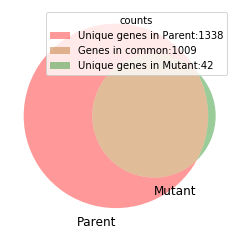

In [13]:
# library
#pip install matplotlib-venn
from collections import Counter

import matplotlib.pyplot as plt
#%matplotlib inline

from matplotlib_venn import venn2, venn3
setLabels=("Parent", "Mutant")
setLabels_legend={'10': "Unique genes in Parent","01": "Unique genes in Mutant","11":"Genes in common"}
sets = Counter()
sets['10'] = sum(Tgfa_parent_DEG)-sum(Tgfa_parent_DEG&Tgfa_mutant_DEG)
sets['11']  = sum(Tgfa_parent_DEG&Tgfa_mutant_DEG)
sets['01'] = sum(Tgfa_mutant_DEG)-sum(Tgfa_parent_DEG&Tgfa_mutant_DEG)

ax = plt.gca()

v = venn2(subsets = sets, set_labels = setLabels, ax = ax)


h, l = [],[]
for i in sets:
    v.get_label_by_id(i).set_text("")
    h.append(v.get_patch_by_id(i))
    l.append(setLabels_legend[i] +":"+ str(sets[i]))
    
ax.legend(handles=h, labels=l, title="counts", loc='upper right')



plt.rcParams["figure.figsize"]=5,5

plt.show()

In [14]:
sum(Tgfa_parent_DEG)

2347

In [15]:
sum(Tgfa_mutant_DEG)

1051

 What genes change increasing in TGFA mut and decreasing in parent, and vice versa.

In [16]:
DEG_mouse

,Tgfa_parent_baseMean,Tgfa_parent_log2FoldChange,Tgfa_parent_lfcSE,Tgfa_parent_stat,Tgfa_parent_pvalue,Tgfa_parent_padj,Tgfa_mut_baseMean,Tgfa_mut_log2FoldChange,Tgfa_mut_lfcSE,Tgfa_mut_stat,Tgfa_mut_pvalue,Tgfa_mut_padj
XKR4,31.315347,-2.824516,0.336447,-8.221071,2.016935e-16,1.143829e-15,19.208375,-1.533961,0.313791,-4.792547,0.000002,0.000010
RP1,27.000214,1.956008,0.332499,5.810778,6.218302e-09,2.097992e-08,25.633864,1.076782,0.296235,3.613506,0.000302,0.001142
SOX17,424.687645,0.515093,0.084360,6.105536,1.024563e-09,3.668974e-09,353.385653,0.293326,0.105436,2.781847,0.005405,0.014639
RNU6-840P,1.597520,-0.843336,0.654834,-1.264456,2.060666e-01,2.661396e-01,2.102350,-0.334465,0.347443,-0.954931,0.339612,0.461353
MRPL15,2203.619488,0.606861,0.063870,9.501402,2.070827e-21,1.541528e-20,1894.011264,0.233964,0.068922,3.394619,0.000687,0.002367
...,...,...,...,...,...,...,...,...,...,...,...,...
SP100,0.553695,-0.384064,0.445486,-0.841678,3.999684e-01,4.735761e-01,0.236131,-0.064247,0.156035,-0.400665,0.688667,NaN
CCL21,3.318267,-0.253982,0.630266,-0.402175,6.875554e-01,7.409092e-01,2.426511,0.077170,0.329026,0.235708,0.813659,0.873388
CCL27,0.257400,-0.217778,0.426822,-0.499917,6.171335e-01,NaN,0.773664,0.134172,0.271833,0.510158,0.609941,NaN
CCL19,1.676218,0.561383,0.628797,0.905534,3.651826e-01,4.378416e-01,0.601007,-0.170586,0.208724,-0.725162,0.468353,NaN


In [17]:
temp1= (DEG_mouse["Tgfa_parent_padj"]<0.05) 
temp2=(DEG_mouse["Tgfa_parent_baseMean"]>50)
temp3=(DEG_mouse["Tgfa_parent_log2FoldChange"]>0)
Tgfa_parent_DEG2=temp1 & temp2 & temp3

temp1= (DEG_mouse["Tgfa_mut_padj"]<0.05) 
temp2=(DEG_mouse["Tgfa_mut_baseMean"]>50)
temp3=(DEG_mouse["Tgfa_mut_log2FoldChange"]<0)
Tgfa_mutant_DEG2=temp1 & temp2 & temp3

In [18]:
print(sum((Tgfa_mutant_DEG2) & (Tgfa_parent_DEG2)))
print(DEG_mouse.index[(Tgfa_mutant_DEG2) & (Tgfa_parent_DEG2)])

17
Index(['DPP7', 'HMCN2', 'SCG5', 'GLMP', 'PKLR', 'TYW3', 'COQ3', 'ANGPTL3',
       'SESN2', 'CIT', 'AACS', 'FUCA2', 'BTBD11', 'PPM1H', 'KCNK5', 'H4C2',
       'ETV5'],
      dtype='object')


In [19]:
DEG_mouse[(Tgfa_mutant_DEG2) & (Tgfa_parent_DEG2)]

,Tgfa_parent_baseMean,Tgfa_parent_log2FoldChange,Tgfa_parent_lfcSE,Tgfa_parent_stat,Tgfa_parent_pvalue,Tgfa_parent_padj,Tgfa_mut_baseMean,Tgfa_mut_log2FoldChange,Tgfa_mut_lfcSE,Tgfa_mut_stat,Tgfa_mut_pvalue,Tgfa_mut_padj
DPP7,2371.227043,0.289990,0.112621,2.574927,0.010026,0.017060,2221.786010,-0.351593,0.055317,-6.355900,2.072098e-10,2.106961e-09
HMCN2,317.372419,0.462610,0.161895,2.857412,0.004271,0.007708,350.520167,-0.801775,0.159750,-5.018052,5.219800e-07,3.319235e-06
SCG5,893.400419,0.382414,0.131932,2.898559,0.003749,0.006822,932.932809,-0.421597,0.092042,-4.580336,4.642306e-06,2.510060e-05
GLMP,4487.272213,0.264890,0.086852,3.049879,0.002289,0.004288,3819.665931,-0.148823,0.061798,-2.408223,1.603041e-02,3.752198e-02
PKLR,1199.272637,0.297542,0.101913,2.919542,0.003505,0.006405,1250.286118,-0.429668,0.122961,-3.494340,4.752356e-04,1.706885e-03
TYW3,1971.129314,0.703144,0.155349,4.526159,0.000006,0.000015,2128.984262,-0.460902,0.152731,-3.017723,2.546814e-03,7.549771e-03
COQ3,802.801766,0.243198,0.099252,2.450296,0.014274,0.023675,663.939981,-0.264752,0.089932,-2.943908,3.240962e-03,9.343245e-03
ANGPTL3,1412.226013,0.338137,0.125542,2.693414,0.007072,0.012339,1502.858917,-0.475783,0.114532,-4.154141,3.265118e-05,1.502997e-04
SESN2,2166.185784,0.503371,0.110296,4.563805,0.000005,0.000013,1670.484930,-0.237216,0.083814,-2.830274,4.650818e-03,1.282312e-02
CIT,556.723660,0.509059,0.132985,3.827795,0.000129,0.000286,491.557394,-0.337021,0.144176,-2.337519,1.941219e-02,4.403662e-02


In [20]:
temp1= (DEG_mouse["Tgfa_parent_padj"]<0.05) 
temp2=(DEG_mouse["Tgfa_parent_baseMean"]>50)
temp3=(DEG_mouse["Tgfa_parent_log2FoldChange"]<0)
Tgfa_parent_DEG2=temp1 & temp2 & temp3

temp1= (DEG_mouse["Tgfa_mut_padj"]<0.05) 
temp2=(DEG_mouse["Tgfa_mut_baseMean"]>50)
temp3=(DEG_mouse["Tgfa_mut_log2FoldChange"]>0)
Tgfa_mutant_DEG2=temp1 & temp2 & temp3

In [21]:
print(sum((Tgfa_mutant_DEG2) & (Tgfa_parent_DEG2)))
print(DEG_mouse.index[(Tgfa_mutant_DEG2) & (Tgfa_parent_DEG2)])

18
Index(['INO80D', 'CAMSAP1', 'BAZ2B', 'CTDSPL2', 'ARID1A', 'VGLL4', 'BHLHE41',
       'KMT2B', 'OTUD4', 'MAP3K21', 'IL17RB', 'KMT2A', 'NCBP3', 'MBTD1',
       'BPTF', 'FOXN3', 'BTBD7', 'JAK2'],
      dtype='object')


In [22]:
DEG_mouse[(Tgfa_mutant_DEG2) & (Tgfa_parent_DEG2)]

,Tgfa_parent_baseMean,Tgfa_parent_log2FoldChange,Tgfa_parent_lfcSE,Tgfa_parent_stat,Tgfa_parent_pvalue,Tgfa_parent_padj,Tgfa_mut_baseMean,Tgfa_mut_log2FoldChange,Tgfa_mut_lfcSE,Tgfa_mut_stat,Tgfa_mut_pvalue,Tgfa_mut_padj
INO80D,2521.285742,-0.166764,0.075138,-2.219423,2.645795e-02,4.182733e-02,1974.090026,0.193392,0.071998,2.686061,7.229997e-03,1.883058e-02
CAMSAP1,1227.327203,-0.153903,0.056103,-2.743239,6.083645e-03,1.072189e-02,953.534108,0.209009,0.070880,2.948743,3.190690e-03,9.219089e-03
BAZ2B,2323.085647,-0.139351,0.059660,-2.335755,1.950402e-02,3.157181e-02,1884.968532,0.157235,0.059531,2.641218,8.260859e-03,2.113945e-02
CTDSPL2,1376.617119,-0.202159,0.089802,-2.251152,2.437588e-02,3.878057e-02,1045.763425,0.164835,0.066799,2.467622,1.360138e-02,3.253911e-02
ARID1A,4061.694408,-0.171023,0.071257,-2.400076,1.639165e-02,2.691126e-02,3198.810602,0.122174,0.041551,2.940313,3.278810e-03,9.437835e-03
VGLL4,1847.803890,-0.235461,0.059477,-3.958837,7.531565e-05,1.714322e-04,1331.078379,0.143507,0.060854,2.358184,1.836457e-02,4.202148e-02
BHLHE41,276.363262,-0.403270,0.133213,-3.027275,2.467692e-03,4.601666e-03,188.425770,0.640333,0.183545,3.487692,4.872084e-04,1.744036e-03
KMT2B,2555.414136,-0.155378,0.065950,-2.355997,1.847306e-02,3.002996e-02,1974.567079,0.157400,0.060002,2.623248,8.709578e-03,2.214405e-02
OTUD4,3865.448332,-0.132964,0.061282,-2.169707,3.002907e-02,4.698226e-02,3120.120555,0.182017,0.047435,3.837163,1.244639e-04,5.098294e-04
MAP3K21,732.873104,-0.255227,0.083638,-3.051560,2.276558e-03,4.266541e-03,528.323704,0.204366,0.076924,2.656704,7.890870e-03,2.032452e-02


----

# Read the main data file

In [23]:
#only DEG in normal mice after Nx , but not in mut mice after Nx
selected_Genes= DEG_mouse.index[Tgfa_parent_DEG & ~Tgfa_mutant_DEG].tolist()

# DEG in either normal mice after Nx or in mut mice after Nx, but not in both
#selected_Genes= DEG_mouse.index[Tgfa_parent_DEG & Tgfa_mutant_DEG].tolist()

In [24]:
temp1=sig_info["cell_id"] == "HA1E"
temp2=sig_info["pert_itime"] == "24 h"
HA1E_ids = sig_info["sig_id"][ temp1& temp2 ]

selected_genes_ids =  [ x in selected_Genes for x in list(gene_info["pr_gene_symbol"])]
selected_genes_ids = list(gene_info[selected_genes_ids]["pr_gene_id"])

Tgfa_mouse_gctoo = parse(data_file_lvl5, cid=HA1E_ids, rid=selected_genes_ids)

In [25]:
Tgfa_mouse_gctoo.data_df

cid,CPC002_HA1E_24H:BRD-K26548821-001-01-8:10,CPC005_HA1E_24H:BRD-A85280935-003-01-7:10,CPC005_HA1E_24H:BRD-A07824748-001-02-6:10,CPC001_HA1E_24H:BRD-A95445494-001-02-9:10,CPC001_HA1E_24H:BRD-K05906022-001-02-8:10,CPC004_HA1E_24H:BRD-K20482099-001-01-1:10,CPC005_HA1E_24H:BRD-K62929068-001-03-3:10,CPC002_HA1E_24H:BRD-K78294846-001-02-5:10,CPC002_HA1E_24H:BRD-K80348542-001-01-4:10,CPC001_HA1E_24H:BRD-K87991767-001-02-0:10,...,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:3.33,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:0.04,PCLB003_HA1E_24H:BRD-K17953061-001-10-1:0.37,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:0.12,PCLB003_HA1E_24H:BRD-K78431006-001-05-2:10,PCLB003_HA1E_24H:BRD-K04466929-001-05-1:10,PCLB003_HA1E_24H:BRD-A36275421-001-06-1:10,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:10,PCLB003_HA1E_24H:BRD-K24576554-001-01-4:10,PCLB003_HA1E_24H:BRD-A52530684-003-01-7:10
rid,,,,,,,,,,,,,,,,,,,,,
1950,-0.033067,0.080542,0.854567,-0.327455,0.044007,-0.196267,1.115680,0.138313,1.897792,0.139022,...,10.0000,10.0000,10.0000,10.0000,3.03250,1.5546,-1.7100,3.4544,6.2276,2.8729
4776,0.206633,0.341061,0.586433,0.073738,0.155655,0.586700,-0.883745,0.086939,-2.319941,0.357485,...,10.0000,3.7744,0.7482,10.0000,0.22390,-1.1191,0.3067,1.2316,-0.4178,-1.3631
3315,-0.140300,0.594652,0.087200,0.424472,0.050928,-0.519133,0.390514,-0.020664,-3.679225,0.448004,...,-1.3322,-1.3067,-3.0008,-9.5916,-2.98325,-0.8634,-0.7317,-1.5454,-1.9709,-0.3756
6774,-0.138933,-0.303212,1.022933,-0.810232,0.734999,-0.218300,-0.520071,1.057253,2.011937,-0.206979,...,-1.9212,-2.3572,-3.0029,-1.7194,1.37930,2.3321,-1.9915,-0.8027,-0.9159,-0.9718
5627,0.178533,0.476983,0.886500,-0.595452,0.998136,0.402333,0.669477,0.928828,-1.803730,-0.310000,...,-0.9553,0.6391,-1.8728,8.9924,-0.13120,10.0000,2.2301,2.6250,0.8957,2.4689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700,-0.279400,0.633251,0.783667,-0.201995,-0.280378,0.392500,0.601703,-0.786787,1.496363,1.056694,...,9.4751,7.2821,6.8879,7.8201,5.44150,1.1566,2.1111,1.2727,1.0511,1.1250
219699,0.708333,-0.189710,-0.263700,-0.007961,-0.797074,0.235067,0.526634,0.262092,0.308785,0.654042,...,7.2349,1.4393,5.4203,4.9206,3.05400,0.2521,2.5346,0.6034,-0.6005,-0.2825
27147,-0.140567,-0.033477,0.359833,-0.264203,-0.822399,0.251367,-0.077965,-0.568759,0.167567,-0.930128,...,6.1157,3.5485,7.2972,5.4631,1.59805,1.6513,0.2735,0.4916,1.6264,1.2935


In [26]:
Tgfa_mouse_gctoo_temp=Tgfa_mouse_gctoo.data_df
#Tgfa_mouse_gctoo=Tgfa_mouse_gctoo_temp

In [27]:
# rename gene-ids into gene symbols
x=[]
for i in list(Tgfa_mouse_gctoo.data_df.index):
    x.append( gene_info.loc[gene_info["pr_gene_id"]==i ,"pr_gene_symbol"].to_string().split("    ")[1])

Tgfa_mouse_gctoo.data_df.index=x
Tgfa_mouse_gctoo.data_df

cid,CPC002_HA1E_24H:BRD-K26548821-001-01-8:10,CPC005_HA1E_24H:BRD-A85280935-003-01-7:10,CPC005_HA1E_24H:BRD-A07824748-001-02-6:10,CPC001_HA1E_24H:BRD-A95445494-001-02-9:10,CPC001_HA1E_24H:BRD-K05906022-001-02-8:10,CPC004_HA1E_24H:BRD-K20482099-001-01-1:10,CPC005_HA1E_24H:BRD-K62929068-001-03-3:10,CPC002_HA1E_24H:BRD-K78294846-001-02-5:10,CPC002_HA1E_24H:BRD-K80348542-001-01-4:10,CPC001_HA1E_24H:BRD-K87991767-001-02-0:10,...,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:3.33,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:0.04,PCLB003_HA1E_24H:BRD-K17953061-001-10-1:0.37,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:0.12,PCLB003_HA1E_24H:BRD-K78431006-001-05-2:10,PCLB003_HA1E_24H:BRD-K04466929-001-05-1:10,PCLB003_HA1E_24H:BRD-A36275421-001-06-1:10,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:10,PCLB003_HA1E_24H:BRD-K24576554-001-01-4:10,PCLB003_HA1E_24H:BRD-A52530684-003-01-7:10
EGF,-0.033067,0.080542,0.854567,-0.327455,0.044007,-0.196267,1.115680,0.138313,1.897792,0.139022,...,10.0000,10.0000,10.0000,10.0000,3.03250,1.5546,-1.7100,3.4544,6.2276,2.8729
NFATC4,0.206633,0.341061,0.586433,0.073738,0.155655,0.586700,-0.883745,0.086939,-2.319941,0.357485,...,10.0000,3.7744,0.7482,10.0000,0.22390,-1.1191,0.3067,1.2316,-0.4178,-1.3631
HSPB1,-0.140300,0.594652,0.087200,0.424472,0.050928,-0.519133,0.390514,-0.020664,-3.679225,0.448004,...,-1.3322,-1.3067,-3.0008,-9.5916,-2.98325,-0.8634,-0.7317,-1.5454,-1.9709,-0.3756
STAT3,-0.138933,-0.303212,1.022933,-0.810232,0.734999,-0.218300,-0.520071,1.057253,2.011937,-0.206979,...,-1.9212,-2.3572,-3.0029,-1.7194,1.37930,2.3321,-1.9915,-0.8027,-0.9159,-0.9718
PROS1,0.178533,0.476983,0.886500,-0.595452,0.998136,0.402333,0.669477,0.928828,-1.803730,-0.310000,...,-0.9553,0.6391,-1.8728,8.9924,-0.13120,10.0000,2.2301,2.6250,0.8957,2.4689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ITIH4,-0.279400,0.633251,0.783667,-0.201995,-0.280378,0.392500,0.601703,-0.786787,1.496363,1.056694,...,9.4751,7.2821,6.8879,7.8201,5.44150,1.1566,2.1111,1.2727,1.0511,1.1250
UNC5B,0.708333,-0.189710,-0.263700,-0.007961,-0.797074,0.235067,0.526634,0.262092,0.308785,0.654042,...,7.2349,1.4393,5.4203,4.9206,3.05400,0.2521,2.5346,0.6034,-0.6005,-0.2825
DENND2A,-0.140567,-0.033477,0.359833,-0.264203,-0.822399,0.251367,-0.077965,-0.568759,0.167567,-0.930128,...,6.1157,3.5485,7.2972,5.4631,1.59805,1.6513,0.2735,0.4916,1.6264,1.2935
CALHM2,0.753200,-0.514996,-0.223367,-0.668027,0.109918,0.570533,-1.288179,-0.648970,-4.672332,0.524914,...,3.1572,2.0891,3.2950,0.7055,1.54840,-2.1393,-0.3357,0.2499,0.7969,0.5850


In [28]:
gene_info.loc[gene_info["pr_gene_id"]=="60" ]

,pr_gene_id,pr_gene_symbol,pr_gene_title,pr_is_lm,pr_is_bing
12327,60,ACTB,"actin, beta",0,1


### Save sliced data

The sliced data can be saved in a smaller file in *gtcx* or *gct* format 

In [29]:
import cmapPy.pandasGEXpress.write_gct as wg
# write GCToo instance to .gct
wg.write(Tgfa_mouse_gctoo, "HA1E")

In [30]:
Tgfa_mouse_gctoo.data_df

cid,CPC002_HA1E_24H:BRD-K26548821-001-01-8:10,CPC005_HA1E_24H:BRD-A85280935-003-01-7:10,CPC005_HA1E_24H:BRD-A07824748-001-02-6:10,CPC001_HA1E_24H:BRD-A95445494-001-02-9:10,CPC001_HA1E_24H:BRD-K05906022-001-02-8:10,CPC004_HA1E_24H:BRD-K20482099-001-01-1:10,CPC005_HA1E_24H:BRD-K62929068-001-03-3:10,CPC002_HA1E_24H:BRD-K78294846-001-02-5:10,CPC002_HA1E_24H:BRD-K80348542-001-01-4:10,CPC001_HA1E_24H:BRD-K87991767-001-02-0:10,...,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:3.33,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:0.04,PCLB003_HA1E_24H:BRD-K17953061-001-10-1:0.37,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:0.12,PCLB003_HA1E_24H:BRD-K78431006-001-05-2:10,PCLB003_HA1E_24H:BRD-K04466929-001-05-1:10,PCLB003_HA1E_24H:BRD-A36275421-001-06-1:10,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:10,PCLB003_HA1E_24H:BRD-K24576554-001-01-4:10,PCLB003_HA1E_24H:BRD-A52530684-003-01-7:10
EGF,-0.033067,0.080542,0.854567,-0.327455,0.044007,-0.196267,1.115680,0.138313,1.897792,0.139022,...,10.0000,10.0000,10.0000,10.0000,3.03250,1.5546,-1.7100,3.4544,6.2276,2.8729
NFATC4,0.206633,0.341061,0.586433,0.073738,0.155655,0.586700,-0.883745,0.086939,-2.319941,0.357485,...,10.0000,3.7744,0.7482,10.0000,0.22390,-1.1191,0.3067,1.2316,-0.4178,-1.3631
HSPB1,-0.140300,0.594652,0.087200,0.424472,0.050928,-0.519133,0.390514,-0.020664,-3.679225,0.448004,...,-1.3322,-1.3067,-3.0008,-9.5916,-2.98325,-0.8634,-0.7317,-1.5454,-1.9709,-0.3756
STAT3,-0.138933,-0.303212,1.022933,-0.810232,0.734999,-0.218300,-0.520071,1.057253,2.011937,-0.206979,...,-1.9212,-2.3572,-3.0029,-1.7194,1.37930,2.3321,-1.9915,-0.8027,-0.9159,-0.9718
PROS1,0.178533,0.476983,0.886500,-0.595452,0.998136,0.402333,0.669477,0.928828,-1.803730,-0.310000,...,-0.9553,0.6391,-1.8728,8.9924,-0.13120,10.0000,2.2301,2.6250,0.8957,2.4689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ITIH4,-0.279400,0.633251,0.783667,-0.201995,-0.280378,0.392500,0.601703,-0.786787,1.496363,1.056694,...,9.4751,7.2821,6.8879,7.8201,5.44150,1.1566,2.1111,1.2727,1.0511,1.1250
UNC5B,0.708333,-0.189710,-0.263700,-0.007961,-0.797074,0.235067,0.526634,0.262092,0.308785,0.654042,...,7.2349,1.4393,5.4203,4.9206,3.05400,0.2521,2.5346,0.6034,-0.6005,-0.2825
DENND2A,-0.140567,-0.033477,0.359833,-0.264203,-0.822399,0.251367,-0.077965,-0.568759,0.167567,-0.930128,...,6.1157,3.5485,7.2972,5.4631,1.59805,1.6513,0.2735,0.4916,1.6264,1.2935
CALHM2,0.753200,-0.514996,-0.223367,-0.668027,0.109918,0.570533,-1.288179,-0.648970,-4.672332,0.524914,...,3.1572,2.0891,3.2950,0.7055,1.54840,-2.1393,-0.3357,0.2499,0.7969,0.5850


### annotate HA1E_ids_info with its corresponding sample annotations


In [31]:
temp1=sig_info["cell_id"] == "HA1E"
temp2=sig_info["pert_itime"] == "24 h"
HA1E_ids_info = sig_info[ temp1& temp2 ]
HA1E_ids_info.set_index("sig_id", inplace=True)
# annotate belinostat_a375_gctoo with its corresponding sample annotations
Tgfa_mouse_gctoo.col_metadata_df = HA1E_ids_info.copy()


In [32]:
Tgfa_mouse_gctoo.data_df.mean(axis = 0)

cid
CPC002_HA1E_24H:BRD-K26548821-001-01-8:10    -0.107984
CPC005_HA1E_24H:BRD-A85280935-003-01-7:10     0.085492
CPC005_HA1E_24H:BRD-A07824748-001-02-6:10    -0.059402
CPC001_HA1E_24H:BRD-A95445494-001-02-9:10    -0.046111
CPC001_HA1E_24H:BRD-K05906022-001-02-8:10    -0.243103
                                                ...   
PCLB003_HA1E_24H:BRD-K04466929-001-05-1:10    0.828944
PCLB003_HA1E_24H:BRD-A36275421-001-06-1:10    1.029582
PCLB003_HA1E_24H:BRD-K56411643-001-02-6:10    0.838926
PCLB003_HA1E_24H:BRD-K24576554-001-01-4:10    0.827811
PCLB003_HA1E_24H:BRD-A52530684-003-01-7:10    0.487330
Length: 3911, dtype: float32

#### Test correlation of the samples

In [33]:
Tgfa_mouse_gctoo_cors = Tgfa_mouse_gctoo.data_df.corr()
Tgfa_mouse_gctoo_cors[0:5] #only showing first 5 rows

cid,CPC002_HA1E_24H:BRD-K26548821-001-01-8:10,CPC005_HA1E_24H:BRD-A85280935-003-01-7:10,CPC005_HA1E_24H:BRD-A07824748-001-02-6:10,CPC001_HA1E_24H:BRD-A95445494-001-02-9:10,CPC001_HA1E_24H:BRD-K05906022-001-02-8:10,CPC004_HA1E_24H:BRD-K20482099-001-01-1:10,CPC005_HA1E_24H:BRD-K62929068-001-03-3:10,CPC002_HA1E_24H:BRD-K78294846-001-02-5:10,CPC002_HA1E_24H:BRD-K80348542-001-01-4:10,CPC001_HA1E_24H:BRD-K87991767-001-02-0:10,...,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:3.33,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:0.04,PCLB003_HA1E_24H:BRD-K17953061-001-10-1:0.37,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:0.12,PCLB003_HA1E_24H:BRD-K78431006-001-05-2:10,PCLB003_HA1E_24H:BRD-K04466929-001-05-1:10,PCLB003_HA1E_24H:BRD-A36275421-001-06-1:10,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:10,PCLB003_HA1E_24H:BRD-K24576554-001-01-4:10,PCLB003_HA1E_24H:BRD-A52530684-003-01-7:10
cid,,,,,,,,,,,,,,,,,,,,,
CPC002_HA1E_24H:BRD-K26548821-001-01-8:10,1.000000,-0.068133,-0.026361,0.107161,0.107018,0.193448,0.076139,0.162125,-0.034400,0.038703,...,-0.212457,-0.218170,-0.188461,-0.140662,-0.152937,-0.099306,-0.061176,-0.074823,-0.075257,-0.096541
CPC005_HA1E_24H:BRD-A85280935-003-01-7:10,-0.068133,1.000000,-0.073684,-0.062507,-0.146766,-0.020593,-0.024060,-0.094239,-0.013555,0.036390,...,0.160313,0.152648,0.091031,0.095968,0.110371,0.035704,0.085574,0.014773,-0.018568,-0.031349
CPC005_HA1E_24H:BRD-A07824748-001-02-6:10,-0.026361,-0.073684,1.000000,0.027322,0.069538,-0.050260,-0.035429,0.176348,0.078757,0.065762,...,0.002297,0.044897,-0.028342,0.007963,-0.008346,0.045485,-0.056630,0.038446,-0.054440,0.049996
CPC001_HA1E_24H:BRD-A95445494-001-02-9:10,0.107161,-0.062507,0.027322,1.000000,0.131406,0.000032,0.059301,-0.103234,0.032511,-0.042592,...,-0.081078,-0.111941,-0.048337,-0.017579,-0.047476,0.037877,-0.013593,-0.106880,0.007158,-0.030111
CPC001_HA1E_24H:BRD-K05906022-001-02-8:10,0.107018,-0.146766,0.069538,0.131406,1.000000,-0.054659,0.309807,0.250533,-0.083736,-0.136057,...,-0.452219,-0.445378,-0.467453,-0.414672,-0.434771,0.022584,-0.098374,-0.146149,-0.191114,-0.212451


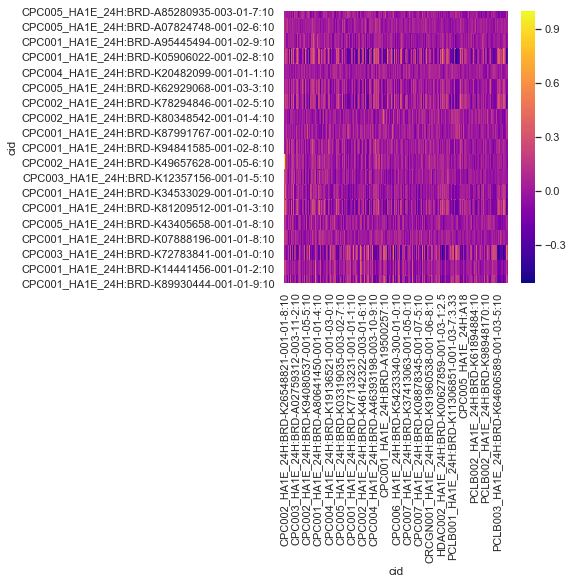

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


sns.heatmap(Tgfa_mouse_gctoo_cors[1:20], cmap='plasma')
plt.show()

----

# Convert to ternary/ semi-binary data

Significant changes are converted into 3 values, I call semi-binary system as it uses "1", "0" and "-1". <br>  
For non-significant changes, the value is **0**. While increased genes have a value of **+1**, and decreased genes have **-1**.<br> <br>
This will allow comparing RNA-Seq to L1000 with less bias... In theory! <br>
In reality we need to upload all the genes so it works. We uploaded ony the DEG from the gctx file!, so the zero is not a real value. Still...

#### Convert RNA-Seq to semi-binary

Get genes changing in parent but not in mutant. The change cutoff is at least 50% or log2FC <mo>&PlusMinus;</mo> 0.58

In [35]:
temp1= (DEG_mouse["Tgfa_parent_padj"]<0.05) 
temp2=(DEG_mouse["Tgfa_parent_baseMean"]>50)
temp3=(DEG_mouse["Tgfa_parent_log2FoldChange"]<(-0.58)) | (DEG_mouse["Tgfa_parent_log2FoldChange"]>(+0.58))
Tgfa_parent_DEG2=temp1 & temp2 & temp3

temp1= (DEG_mouse["Tgfa_mut_padj"]<0.05) 
temp2=(DEG_mouse["Tgfa_mut_baseMean"]>50)
temp3= (DEG_mouse["Tgfa_mut_log2FoldChange"]<(-0.58)) | (DEG_mouse["Tgfa_mut_log2FoldChange"]>(+0.58))
Tgfa_mutant_DEG2=temp1 & temp2 & temp3

print(sum(Tgfa_parent_DEG2))
print(sum(Tgfa_mutant_DEG2))
print(sum(Tgfa_parent_DEG2 & ~Tgfa_mutant_DEG2))
print(sum(Tgfa_parent_DEG2 & Tgfa_mutant_DEG2))
#sb_DEG_mouse

4138
2062
2186
1952


In [36]:
DEG_mouse

,Tgfa_parent_baseMean,Tgfa_parent_log2FoldChange,Tgfa_parent_lfcSE,Tgfa_parent_stat,Tgfa_parent_pvalue,Tgfa_parent_padj,Tgfa_mut_baseMean,Tgfa_mut_log2FoldChange,Tgfa_mut_lfcSE,Tgfa_mut_stat,Tgfa_mut_pvalue,Tgfa_mut_padj
XKR4,31.315347,-2.824516,0.336447,-8.221071,2.016935e-16,1.143829e-15,19.208375,-1.533961,0.313791,-4.792547,0.000002,0.000010
RP1,27.000214,1.956008,0.332499,5.810778,6.218302e-09,2.097992e-08,25.633864,1.076782,0.296235,3.613506,0.000302,0.001142
SOX17,424.687645,0.515093,0.084360,6.105536,1.024563e-09,3.668974e-09,353.385653,0.293326,0.105436,2.781847,0.005405,0.014639
RNU6-840P,1.597520,-0.843336,0.654834,-1.264456,2.060666e-01,2.661396e-01,2.102350,-0.334465,0.347443,-0.954931,0.339612,0.461353
MRPL15,2203.619488,0.606861,0.063870,9.501402,2.070827e-21,1.541528e-20,1894.011264,0.233964,0.068922,3.394619,0.000687,0.002367
...,...,...,...,...,...,...,...,...,...,...,...,...
SP100,0.553695,-0.384064,0.445486,-0.841678,3.999684e-01,4.735761e-01,0.236131,-0.064247,0.156035,-0.400665,0.688667,NaN
CCL21,3.318267,-0.253982,0.630266,-0.402175,6.875554e-01,7.409092e-01,2.426511,0.077170,0.329026,0.235708,0.813659,0.873388
CCL27,0.257400,-0.217778,0.426822,-0.499917,6.171335e-01,NaN,0.773664,0.134172,0.271833,0.510158,0.609941,NaN
CCL19,1.676218,0.561383,0.628797,0.905534,3.651826e-01,4.378416e-01,0.601007,-0.170586,0.208724,-0.725162,0.468353,NaN


In [37]:
import numpy as np

sb_DEG_mouse= np.repeat(0,len(Tgfa_mutant_DEG2))
#sb_DEG_mouse[DEG_mouse["Tgfa_parent_log2FoldChange"]<(-0.58)]=(-1)
#sb_DEG_mouse[DEG_mouse["Tgfa_parent_log2FoldChange"]>(0.58)]=(1)
sb_DEG_mouse[DEG_mouse["Tgfa_parent_log2FoldChange"]<(-1*Fc_RNA_cutoff)]=(-1)
sb_DEG_mouse[DEG_mouse["Tgfa_parent_log2FoldChange"]>(Fc_RNA_cutoff)]=(1)
sb_DEG_mouse=list(sb_DEG_mouse)
sb_DEG_mouse=pd.DataFrame(sb_DEG_mouse, index= DEG_mouse.index, columns=["MOUSE"])
sb_DEG_mouse

,MOUSE
XKR4,-1
RP1,1
SOX17,0
RNU6-840P,-1
MRPL15,0
...,...
SP100,0
CCL21,0
CCL27,0
CCL19,0


In [38]:
from collections import Counter

Counter(sb_DEG_mouse["MOUSE"])

Counter({-1: 3127, 1: 1295, 0: 13148})

In [39]:
len(selected_genes_ids)

sum(sb_DEG_mouse["MOUSE"].abs()>0)

4422

In [40]:
DEG_mouse[Tgfa_mutant_DEG2]

,Tgfa_parent_baseMean,Tgfa_parent_log2FoldChange,Tgfa_parent_lfcSE,Tgfa_parent_stat,Tgfa_parent_pvalue,Tgfa_parent_padj,Tgfa_mut_baseMean,Tgfa_mut_log2FoldChange,Tgfa_mut_lfcSE,Tgfa_mut_stat,Tgfa_mut_pvalue,Tgfa_mut_padj
TCF24,1441.016871,-0.695853,0.110956,-6.271409,3.577949e-10,1.330139e-09,1240.727185,-0.854662,0.082152,-10.402701,2.410024e-25,1.135894e-23
SULF1,705.088320,-2.199420,0.225710,-9.741369,2.008303e-22,1.572569e-21,311.320097,-1.337556,0.198343,-6.738871,1.596225e-11,1.917004e-10
LY96,190.416762,-0.840277,0.119303,-7.042517,1.887975e-12,8.224904e-12,131.825960,-0.808310,0.131556,-6.139650,8.270336e-10,7.810699e-09
PI15,508.420772,-1.157321,0.120061,-9.638532,5.496824e-22,4.224102e-21,340.437263,-1.016000,0.134258,-7.564624,3.889891e-14,6.344036e-13
MCM3,525.212446,-2.048535,0.117754,-17.389738,9.868473e-68,4.462711e-66,335.387984,-1.554084,0.190235,-8.161067,3.320770e-16,6.698749e-15
...,...,...,...,...,...,...,...,...,...,...,...,...
GPAM,3145.335061,0.684100,0.067235,10.174649,2.573259e-24,2.237096e-23,2495.403249,0.598238,0.106709,5.606136,2.068937e-08,1.622670e-07
VWA2,1280.587434,1.212399,0.093893,12.911637,3.869840e-38,6.171293e-37,1094.415384,1.210014,0.102110,11.847745,2.210605e-32,1.762370e-30
PNLIPRP1,5576.530604,-2.438159,0.653047,-6.503569,7.843651e-11,3.070156e-10,336.197395,-1.311954,0.359728,-4.986838,6.137559e-07,3.847333e-06
SHTN1,1166.887394,-1.231759,0.071659,-17.188333,3.247361e-66,1.396099e-64,768.523716,-0.914559,0.076166,-12.005467,3.325817e-33,2.816234e-31


#### Convert L1000 to semi-binary

This is tricky. Mainly because L1000 is based on plates, and each plate has a DMSO sample as contro. Previousely we found that DMSO samples for the same cell-line differ from plate to another. And the triplicate DMSO have major diffeences sometimes. This means, each sample needs to be compared to the DMSO on its plate.<br> <br>
The dish has 376 wells with 15-17 DMSO samples.

In [41]:
sample_names=HA1E_ids_info["distil_id"]

In [42]:
dish_names=[]
for i in sample_names:
    dish_names.append(i.split("_")[0])

In [43]:
dish_names

['CPC003',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',

In [44]:
HA1E_ids_info["dish_name"]=dish_names

/home/ros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
HA1E_ids_info

,pert_id,pert_iname,pert_type,cell_id,pert_dose,pert_dose_unit,pert_idose,pert_time,pert_time_unit,pert_itime,distil_id,dish_name
sig_id,,,,,,,,,,,,
CNS001_HA1E_24H:DMSO:0.1,CNS001-DMSO,DMSO,ctl_vehicle.cns,HA1E,0.1,%,0.1 %,24,h,24 h,CPC003_HA1E_24H:DMSO:-666|CPC004_HA1E_24H:DMSO...,CPC003
CPC001_HA1E_24H:A17,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X1_B3_DUO52HI53LO:A17|CPC001_H...,CPC001
CPC001_HA1E_24H:B17,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X1_B3_DUO52HI53LO:B17|CPC001_H...,CPC001
CPC001_HA1E_24H:B18,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X2_B3_DUO52HI53LO:B18,CPC001
CPC001_HA1E_24H:BRD-A00267231-001-01-1:10,BRD-A00267231,hemado,trt_cp,HA1E,10,µM,10 µM,24,h,24 h,CPC001_HA1E_24H_X1_B3_DUO52HI53LO:N03|CPC001_H...,CPC001
...,...,...,...,...,...,...,...,...,...,...,...,...
PCLB003_HA1E_24H:BRD-K98109757-001-01-0:0.37,BRD-K98109757,cyclopentene,trt_cp,HA1E,0.37,µM,0.37 µM,24,h,24 h,PCLB003_HA1E_24H_X1_B13:M22|PCLB003_HA1E_24H_X...,PCLB003
PCLB003_HA1E_24H:BRD-K98109757-001-01-0:1.11,BRD-K98109757,cyclopentene,trt_cp,HA1E,1.11,µM,1.11 µM,24,h,24 h,PCLB003_HA1E_24H_X1_B13:M21|PCLB003_HA1E_24H_X...,PCLB003
PCLB003_HA1E_24H:BRD-K98109757-001-01-0:10,BRD-K98109757,cyclopentene,trt_cp,HA1E,10,µM,10 µM,24,h,24 h,PCLB003_HA1E_24H_X1_B13:M19|PCLB003_HA1E_24H_X...,PCLB003


In [46]:
DMSO_data=HA1E_ids_info[HA1E_ids_info["pert_id"]=="DMSO"]
Tgfa_mouse_gctoo.col_metadata_df = HA1E_ids_info.copy()


In [47]:
DMSO_data

,pert_id,pert_iname,pert_type,cell_id,pert_dose,pert_dose_unit,pert_idose,pert_time,pert_time_unit,pert_itime,distil_id,dish_name
sig_id,,,,,,,,,,,,
CPC001_HA1E_24H:A17,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X1_B3_DUO52HI53LO:A17|CPC001_H...,CPC001
CPC001_HA1E_24H:B17,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X1_B3_DUO52HI53LO:B17|CPC001_H...,CPC001
CPC001_HA1E_24H:B18,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X2_B3_DUO52HI53LO:B18,CPC001
CPC001_HA1E_24H:DMSO:-666,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24,h,24 h,CPC001_HA1E_24H_X1_B3_DUO52HI53LO:A17|CPC001_H...,CPC001
CPC001_HA1E_24H:E05,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X3_B3_DUO52HI53LO:E05,CPC001
...,...,...,...,...,...,...,...,...,...,...,...,...
PCLB001_HA1E_24H:O06,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24,h,24 h,PCLB001_HA1E_24H_X1_F2B6_DUO52HI53LO:O06|PCLB0...,PCLB001
PCLB001_HA1E_24H:P05,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24,h,24 h,PCLB001_HA1E_24H_X2_B12:P05|PCLB001_HA1E_24H_X...,PCLB001
PCLB001_HA1E_24H:P06,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24,h,24 h,PCLB001_HA1E_24H_X3_F2B6_DUO52HI53LO:P06,PCLB001


In [48]:
Counter(DMSO_data["dish_name"])

Counter({'CPC001': 16,
         'CPC002': 15,
         'CPC003': 16,
         'CPC004': 17,
         'CPC005': 16,
         'CPC006': 15,
         'CPC007': 25,
         'CRCGN001': 18,
         'CRCGN004': 19,
         'HDAC002': 29,
         'PCLB001': 16,
         'PCLB002': 1,
         'PCLB003': 1})

In [49]:
(Counter(HA1E_ids_info["dish_name"]))

Counter({'CPC003': 376,
         'CPC001': 376,
         'CPC002': 375,
         'CPC004': 374,
         'CPC005': 376,
         'CPC006': 357,
         'CPC007': 372,
         'CRCGN001': 113,
         'CRCGN004': 112,
         'HDAC002': 204,
         'PCLB001': 231,
         'PCLB002': 295,
         'PCLB003': 350})

In [50]:
(Counter(HA1E_ids_info["pert_iname"]))

Counter({'DMSO': 205,
         'hemado': 1,
         '7-hydroxy-PIPAT': 1,
         'ICI-89406': 1,
         'CP-55940': 1,
         'CGP-52432': 1,
         'BRD-A06276885': 1,
         'ipratropium': 3,
         'cilnidipine': 1,
         'nomilin': 1,
         'SKF-81297': 1,
         'norketamine': 1,
         'SB-205607': 1,
         'LY-278584': 1,
         'scopolamine': 3,
         'UB-165': 1,
         'BMY-14802': 1,
         'SDZ-21009': 1,
         'brefeldin-a': 2,
         'trichostatin-a': 21,
         'vinpocetine': 2,
         'geldanamycin': 22,
         'IB-MECA': 2,
         'WAY-213613': 1,
         'naltriben': 1,
         'SB-205384': 1,
         'vinblastine': 4,
         'paclitaxel': 4,
         'BE-2254': 1,
         'isamoltane': 1,
         'diarylpropionitrile': 1,
         'aminomethyltransferase': 1,
         'methyllycaconitine': 1,
         'MRS-1845': 1,
         'CGP-12177': 1,
         'rutin': 2,
         'genistein': 21,
         'cyclosporin-a': 

## Get DMSO samples only

In [51]:

DMSO_gctoo=  Tgfa_mouse_gctoo.data_df[ Tgfa_mouse_gctoo.col_metadata_df.index[(Tgfa_mouse_gctoo.col_metadata_df["pert_id"] =="DMSO")]]

In [52]:
DMSO_gctoo

cid,CPC001_HA1E_24H:DMSO:-666,CPC002_HA1E_24H:DMSO:-666,CPC003_HA1E_24H:DMSO:-666,CPC004_HA1E_24H:DMSO:-666,CPC005_HA1E_24H:DMSO:-666,CPC006_HA1E_24H:DMSO:-666,CPC007_HA1E_24H:DMSO:-666,CRCGN001_HA1E_24H:DMSO:-666,HDAC002_HA1E_24H:DMSO:0.1,CRCGN004_HA1E_24H:DMSO:-666,...,PCLB001_HA1E_24H:D18,PCLB001_HA1E_24H:O06,PCLB001_HA1E_24H:C17,PCLB001_HA1E_24H:D09,PCLB001_HA1E_24H:P05,PCLB001_HA1E_24H:C09,PCLB001_HA1E_24H:O05,PCLB001_HA1E_24H:P06,PCLB002_HA1E_24H:DMSO:-666,PCLB003_HA1E_24H:DMSO:-666
EGF,0.201082,0.546844,0.283142,0.355632,0.304428,0.352665,0.216177,0.629303,-0.130182,-0.077011,...,0.981154,-0.12620,-0.19390,-0.35395,-0.64345,-1.6242,-2.3423,-1.2524,-0.096204,0.225977
NFATC4,0.307935,-0.165293,-0.195903,0.101274,-0.703471,0.113268,0.191480,0.576542,-0.709037,0.177905,...,-0.612749,0.36360,0.33180,0.08940,-0.16900,-0.2401,-0.2124,0.4332,0.418636,0.458170
HSPB1,0.013118,0.326769,0.319199,0.148589,0.135396,0.054254,0.271671,-0.725908,0.378205,0.150752,...,0.225340,0.27555,0.01345,0.10835,-1.23110,1.1708,0.0000,-0.5053,0.025275,-0.390536
STAT3,1.130075,0.959747,0.531261,0.452075,0.533622,0.332000,0.132575,0.406173,0.382325,0.103470,...,0.675702,-0.58210,0.36570,0.08135,-0.53050,0.3846,-1.0138,0.6443,0.252750,-0.164230
PROS1,0.135238,0.566976,0.530074,0.189505,0.361220,-0.047182,-0.319035,-0.534721,0.524029,0.314280,...,0.261528,0.00000,-0.98110,0.25010,-4.98910,-0.2356,0.3731,0.7225,0.086720,-0.731619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ITIH4,-0.186471,-0.497842,-0.478322,-0.722736,-0.229039,-0.381497,-0.148581,-0.154936,-0.695740,-0.156945,...,-0.705661,-0.04500,-0.68410,0.11470,0.48110,0.6788,-0.0765,0.7523,-0.553556,0.449566
UNC5B,-0.143683,-0.177063,-0.573585,-0.446791,-0.132672,-0.330564,0.028819,0.319988,-0.249507,0.211489,...,-1.345229,-0.59510,0.18325,-0.62925,-0.15200,1.6312,-0.2652,-0.0383,-0.733738,0.569563
DENND2A,-0.077600,-0.642211,-0.442792,-0.163752,-0.176894,-0.337216,-0.251801,0.182847,-0.384645,-0.075025,...,-0.350466,0.16320,-1.22510,-0.23505,-0.49570,-0.3650,0.4806,0.5746,-0.382063,0.553525
CALHM2,-0.338650,-0.229400,-0.112435,-0.025924,0.234329,-0.093826,-0.165214,-0.039129,0.071198,0.086855,...,0.397778,-1.29355,-0.27750,0.46985,-0.66165,0.5349,1.1411,-1.4631,-0.068835,-0.263413


In [53]:
from sklearn.decomposition import PCA
pca_DMSO = PCA(n_components=2)
principalComponents_DMSO = pca_DMSO.fit_transform(DMSO_gctoo.transpose())
principalComponents_DMSO = pd.DataFrame(data = principalComponents_DMSO
             , columns = ['principal component 1', 'principal component 2'])

In [54]:

targets = list(Tgfa_mouse_gctoo.col_metadata_df[(Tgfa_mouse_gctoo.col_metadata_df["pert_id"] =="DMSO")]["dish_name"])

#plot

groups= Tgfa_mouse_gctoo.col_metadata_df[(Tgfa_mouse_gctoo.col_metadata_df["pert_id"] =="DMSO")].groupby("dish_name")



groups=principalComponents_DMSO
groups["dishname"]=list(Tgfa_mouse_gctoo.col_metadata_df[(Tgfa_mouse_gctoo.col_metadata_df["pert_id"] =="DMSO")]["dish_name"])


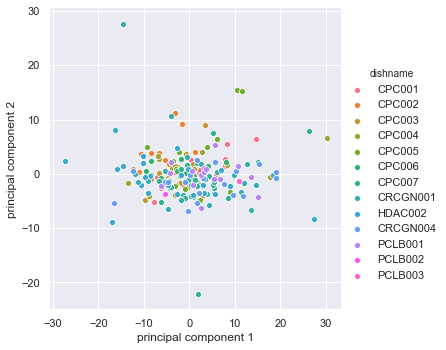

In [55]:
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = 50,50

%matplotlib inline

sns.pairplot(x_vars= 'principal component 1',
             y_vars='principal component 2',
             data=groups, hue="dishname", height=5)


# Making the averages for DMSO in each plate


In [56]:
DMSO_gctoo

cid,CPC001_HA1E_24H:DMSO:-666,CPC002_HA1E_24H:DMSO:-666,CPC003_HA1E_24H:DMSO:-666,CPC004_HA1E_24H:DMSO:-666,CPC005_HA1E_24H:DMSO:-666,CPC006_HA1E_24H:DMSO:-666,CPC007_HA1E_24H:DMSO:-666,CRCGN001_HA1E_24H:DMSO:-666,HDAC002_HA1E_24H:DMSO:0.1,CRCGN004_HA1E_24H:DMSO:-666,...,PCLB001_HA1E_24H:D18,PCLB001_HA1E_24H:O06,PCLB001_HA1E_24H:C17,PCLB001_HA1E_24H:D09,PCLB001_HA1E_24H:P05,PCLB001_HA1E_24H:C09,PCLB001_HA1E_24H:O05,PCLB001_HA1E_24H:P06,PCLB002_HA1E_24H:DMSO:-666,PCLB003_HA1E_24H:DMSO:-666
EGF,0.201082,0.546844,0.283142,0.355632,0.304428,0.352665,0.216177,0.629303,-0.130182,-0.077011,...,0.981154,-0.12620,-0.19390,-0.35395,-0.64345,-1.6242,-2.3423,-1.2524,-0.096204,0.225977
NFATC4,0.307935,-0.165293,-0.195903,0.101274,-0.703471,0.113268,0.191480,0.576542,-0.709037,0.177905,...,-0.612749,0.36360,0.33180,0.08940,-0.16900,-0.2401,-0.2124,0.4332,0.418636,0.458170
HSPB1,0.013118,0.326769,0.319199,0.148589,0.135396,0.054254,0.271671,-0.725908,0.378205,0.150752,...,0.225340,0.27555,0.01345,0.10835,-1.23110,1.1708,0.0000,-0.5053,0.025275,-0.390536
STAT3,1.130075,0.959747,0.531261,0.452075,0.533622,0.332000,0.132575,0.406173,0.382325,0.103470,...,0.675702,-0.58210,0.36570,0.08135,-0.53050,0.3846,-1.0138,0.6443,0.252750,-0.164230
PROS1,0.135238,0.566976,0.530074,0.189505,0.361220,-0.047182,-0.319035,-0.534721,0.524029,0.314280,...,0.261528,0.00000,-0.98110,0.25010,-4.98910,-0.2356,0.3731,0.7225,0.086720,-0.731619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ITIH4,-0.186471,-0.497842,-0.478322,-0.722736,-0.229039,-0.381497,-0.148581,-0.154936,-0.695740,-0.156945,...,-0.705661,-0.04500,-0.68410,0.11470,0.48110,0.6788,-0.0765,0.7523,-0.553556,0.449566
UNC5B,-0.143683,-0.177063,-0.573585,-0.446791,-0.132672,-0.330564,0.028819,0.319988,-0.249507,0.211489,...,-1.345229,-0.59510,0.18325,-0.62925,-0.15200,1.6312,-0.2652,-0.0383,-0.733738,0.569563
DENND2A,-0.077600,-0.642211,-0.442792,-0.163752,-0.176894,-0.337216,-0.251801,0.182847,-0.384645,-0.075025,...,-0.350466,0.16320,-1.22510,-0.23505,-0.49570,-0.3650,0.4806,0.5746,-0.382063,0.553525
CALHM2,-0.338650,-0.229400,-0.112435,-0.025924,0.234329,-0.093826,-0.165214,-0.039129,0.071198,0.086855,...,0.397778,-1.29355,-0.27750,0.46985,-0.66165,0.5349,1.1411,-1.4631,-0.068835,-0.263413


In [57]:
DMSO_data

,pert_id,pert_iname,pert_type,cell_id,pert_dose,pert_dose_unit,pert_idose,pert_time,pert_time_unit,pert_itime,distil_id,dish_name
sig_id,,,,,,,,,,,,
CPC001_HA1E_24H:A17,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X1_B3_DUO52HI53LO:A17|CPC001_H...,CPC001
CPC001_HA1E_24H:B17,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X1_B3_DUO52HI53LO:B17|CPC001_H...,CPC001
CPC001_HA1E_24H:B18,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X2_B3_DUO52HI53LO:B18,CPC001
CPC001_HA1E_24H:DMSO:-666,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24,h,24 h,CPC001_HA1E_24H_X1_B3_DUO52HI53LO:A17|CPC001_H...,CPC001
CPC001_HA1E_24H:E05,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X3_B3_DUO52HI53LO:E05,CPC001
...,...,...,...,...,...,...,...,...,...,...,...,...
PCLB001_HA1E_24H:O06,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24,h,24 h,PCLB001_HA1E_24H_X1_F2B6_DUO52HI53LO:O06|PCLB0...,PCLB001
PCLB001_HA1E_24H:P05,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24,h,24 h,PCLB001_HA1E_24H_X2_B12:P05|PCLB001_HA1E_24H_X...,PCLB001
PCLB001_HA1E_24H:P06,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24,h,24 h,PCLB001_HA1E_24H_X3_F2B6_DUO52HI53LO:P06,PCLB001


Obtain the plate names

In [58]:
Plates= list(Counter(DMSO_data["dish_name"]).keys())

In [59]:
DMSO_averages=pd.DataFrame()
for i in Plates:
    samples_name_temp = list(DMSO_data.index[DMSO_data["dish_name"]== i])
    if (DMSO_averages.shape[0]==0):
        DMSO_averages=pd.DataFrame(DMSO_gctoo[samples_name_temp].mean(axis=1),columns=[i])
    else:
        DMSO_averages=pd.concat([DMSO_averages, 
                                 pd.DataFrame(DMSO_gctoo[samples_name_temp].mean(axis=1),columns=[i])],
                                axis=1)
    
DMSO_averages

,CPC001,CPC002,CPC003,CPC004,CPC005,CPC006,CPC007,CRCGN001,CRCGN004,HDAC002,PCLB001,PCLB002,PCLB003
EGF,0.132925,0.626482,0.261814,0.298510,0.097797,0.339050,0.161272,0.172876,0.096964,0.014047,0.331187,-0.096204,0.225977
NFATC4,0.310522,-0.222074,-0.248539,0.240109,-0.518104,0.127175,0.080968,0.114046,0.142401,-0.411546,-0.027872,0.418636,0.458170
HSPB1,0.034527,0.284512,0.206019,-0.012999,0.217169,0.036679,0.243555,-0.201743,-0.257257,0.289233,0.078744,0.025275,-0.390536
STAT3,0.862290,0.802155,0.332166,0.234640,0.432720,0.256691,0.045677,0.153363,-0.050825,0.229370,-0.117542,0.252750,-0.164230
PROS1,-0.013406,0.483022,0.403214,0.001050,0.187156,-0.033502,-0.374860,-0.288316,0.255175,0.416080,-0.773409,0.086720,-0.731619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ITIH4,-0.189756,-0.417864,-0.468332,-0.383850,-0.049790,-0.312675,-0.009080,-0.436598,-0.049430,-0.431174,0.065949,-0.553556,0.449566
UNC5B,-0.084177,-0.229933,-0.463065,-0.331106,-0.091356,-0.355360,0.082744,-0.263802,0.233757,-0.153661,-0.304237,-0.733738,0.569563
DENND2A,-0.001966,-0.666827,-0.327877,-0.060442,-0.096059,-0.279476,-0.088930,-0.091921,-0.106994,-0.247226,-0.100522,-0.382063,0.553525
CALHM2,-0.279278,-0.415349,-0.056071,-0.037711,0.250455,-0.126214,-0.221445,-0.283511,0.330348,0.126729,-0.331007,-0.068835,-0.263413


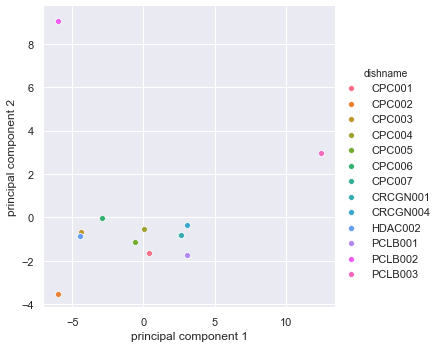

In [60]:
pca_DMSO = PCA(n_components=2)
principalComponents_DMSO = pca_DMSO.fit_transform(DMSO_averages.transpose())
principalComponents_DMSO = pd.DataFrame(data = principalComponents_DMSO
             , columns = ['principal component 1', 'principal component 2'])


groups=principalComponents_DMSO
groups["dishname"]= list(DMSO_averages.columns)


sns.pairplot(x_vars= 'principal component 1',
             y_vars='principal component 2',
             data=groups, hue="dishname", height=5)


In [61]:
DMSO_averages

,CPC001,CPC002,CPC003,CPC004,CPC005,CPC006,CPC007,CRCGN001,CRCGN004,HDAC002,PCLB001,PCLB002,PCLB003
EGF,0.132925,0.626482,0.261814,0.298510,0.097797,0.339050,0.161272,0.172876,0.096964,0.014047,0.331187,-0.096204,0.225977
NFATC4,0.310522,-0.222074,-0.248539,0.240109,-0.518104,0.127175,0.080968,0.114046,0.142401,-0.411546,-0.027872,0.418636,0.458170
HSPB1,0.034527,0.284512,0.206019,-0.012999,0.217169,0.036679,0.243555,-0.201743,-0.257257,0.289233,0.078744,0.025275,-0.390536
STAT3,0.862290,0.802155,0.332166,0.234640,0.432720,0.256691,0.045677,0.153363,-0.050825,0.229370,-0.117542,0.252750,-0.164230
PROS1,-0.013406,0.483022,0.403214,0.001050,0.187156,-0.033502,-0.374860,-0.288316,0.255175,0.416080,-0.773409,0.086720,-0.731619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ITIH4,-0.189756,-0.417864,-0.468332,-0.383850,-0.049790,-0.312675,-0.009080,-0.436598,-0.049430,-0.431174,0.065949,-0.553556,0.449566
UNC5B,-0.084177,-0.229933,-0.463065,-0.331106,-0.091356,-0.355360,0.082744,-0.263802,0.233757,-0.153661,-0.304237,-0.733738,0.569563
DENND2A,-0.001966,-0.666827,-0.327877,-0.060442,-0.096059,-0.279476,-0.088930,-0.091921,-0.106994,-0.247226,-0.100522,-0.382063,0.553525
CALHM2,-0.279278,-0.415349,-0.056071,-0.037711,0.250455,-0.126214,-0.221445,-0.283511,0.330348,0.126729,-0.331007,-0.068835,-0.263413


In [62]:
HA1E_ids_info


,pert_id,pert_iname,pert_type,cell_id,pert_dose,pert_dose_unit,pert_idose,pert_time,pert_time_unit,pert_itime,distil_id,dish_name
sig_id,,,,,,,,,,,,
CNS001_HA1E_24H:DMSO:0.1,CNS001-DMSO,DMSO,ctl_vehicle.cns,HA1E,0.1,%,0.1 %,24,h,24 h,CPC003_HA1E_24H:DMSO:-666|CPC004_HA1E_24H:DMSO...,CPC003
CPC001_HA1E_24H:A17,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X1_B3_DUO52HI53LO:A17|CPC001_H...,CPC001
CPC001_HA1E_24H:B17,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X1_B3_DUO52HI53LO:B17|CPC001_H...,CPC001
CPC001_HA1E_24H:B18,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X2_B3_DUO52HI53LO:B18,CPC001
CPC001_HA1E_24H:BRD-A00267231-001-01-1:10,BRD-A00267231,hemado,trt_cp,HA1E,10,µM,10 µM,24,h,24 h,CPC001_HA1E_24H_X1_B3_DUO52HI53LO:N03|CPC001_H...,CPC001
...,...,...,...,...,...,...,...,...,...,...,...,...
PCLB003_HA1E_24H:BRD-K98109757-001-01-0:0.37,BRD-K98109757,cyclopentene,trt_cp,HA1E,0.37,µM,0.37 µM,24,h,24 h,PCLB003_HA1E_24H_X1_B13:M22|PCLB003_HA1E_24H_X...,PCLB003
PCLB003_HA1E_24H:BRD-K98109757-001-01-0:1.11,BRD-K98109757,cyclopentene,trt_cp,HA1E,1.11,µM,1.11 µM,24,h,24 h,PCLB003_HA1E_24H_X1_B13:M21|PCLB003_HA1E_24H_X...,PCLB003
PCLB003_HA1E_24H:BRD-K98109757-001-01-0:10,BRD-K98109757,cyclopentene,trt_cp,HA1E,10,µM,10 µM,24,h,24 h,PCLB003_HA1E_24H_X1_B13:M19|PCLB003_HA1E_24H_X...,PCLB003


In [63]:
Tgfa_mouse_gctoo.data_df

cid,CPC002_HA1E_24H:BRD-K26548821-001-01-8:10,CPC005_HA1E_24H:BRD-A85280935-003-01-7:10,CPC005_HA1E_24H:BRD-A07824748-001-02-6:10,CPC001_HA1E_24H:BRD-A95445494-001-02-9:10,CPC001_HA1E_24H:BRD-K05906022-001-02-8:10,CPC004_HA1E_24H:BRD-K20482099-001-01-1:10,CPC005_HA1E_24H:BRD-K62929068-001-03-3:10,CPC002_HA1E_24H:BRD-K78294846-001-02-5:10,CPC002_HA1E_24H:BRD-K80348542-001-01-4:10,CPC001_HA1E_24H:BRD-K87991767-001-02-0:10,...,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:3.33,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:0.04,PCLB003_HA1E_24H:BRD-K17953061-001-10-1:0.37,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:0.12,PCLB003_HA1E_24H:BRD-K78431006-001-05-2:10,PCLB003_HA1E_24H:BRD-K04466929-001-05-1:10,PCLB003_HA1E_24H:BRD-A36275421-001-06-1:10,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:10,PCLB003_HA1E_24H:BRD-K24576554-001-01-4:10,PCLB003_HA1E_24H:BRD-A52530684-003-01-7:10
EGF,-0.033067,0.080542,0.854567,-0.327455,0.044007,-0.196267,1.115680,0.138313,1.897792,0.139022,...,10.0000,10.0000,10.0000,10.0000,3.03250,1.5546,-1.7100,3.4544,6.2276,2.8729
NFATC4,0.206633,0.341061,0.586433,0.073738,0.155655,0.586700,-0.883745,0.086939,-2.319941,0.357485,...,10.0000,3.7744,0.7482,10.0000,0.22390,-1.1191,0.3067,1.2316,-0.4178,-1.3631
HSPB1,-0.140300,0.594652,0.087200,0.424472,0.050928,-0.519133,0.390514,-0.020664,-3.679225,0.448004,...,-1.3322,-1.3067,-3.0008,-9.5916,-2.98325,-0.8634,-0.7317,-1.5454,-1.9709,-0.3756
STAT3,-0.138933,-0.303212,1.022933,-0.810232,0.734999,-0.218300,-0.520071,1.057253,2.011937,-0.206979,...,-1.9212,-2.3572,-3.0029,-1.7194,1.37930,2.3321,-1.9915,-0.8027,-0.9159,-0.9718
PROS1,0.178533,0.476983,0.886500,-0.595452,0.998136,0.402333,0.669477,0.928828,-1.803730,-0.310000,...,-0.9553,0.6391,-1.8728,8.9924,-0.13120,10.0000,2.2301,2.6250,0.8957,2.4689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ITIH4,-0.279400,0.633251,0.783667,-0.201995,-0.280378,0.392500,0.601703,-0.786787,1.496363,1.056694,...,9.4751,7.2821,6.8879,7.8201,5.44150,1.1566,2.1111,1.2727,1.0511,1.1250
UNC5B,0.708333,-0.189710,-0.263700,-0.007961,-0.797074,0.235067,0.526634,0.262092,0.308785,0.654042,...,7.2349,1.4393,5.4203,4.9206,3.05400,0.2521,2.5346,0.6034,-0.6005,-0.2825
DENND2A,-0.140567,-0.033477,0.359833,-0.264203,-0.822399,0.251367,-0.077965,-0.568759,0.167567,-0.930128,...,6.1157,3.5485,7.2972,5.4631,1.59805,1.6513,0.2735,0.4916,1.6264,1.2935
CALHM2,0.753200,-0.514996,-0.223367,-0.668027,0.109918,0.570533,-1.288179,-0.648970,-4.672332,0.524914,...,3.1572,2.0891,3.2950,0.7055,1.54840,-2.1393,-0.3357,0.2499,0.7969,0.5850


------
## Normalized Data of L1000 by DMSO averages in each plate

In [64]:
Normalized_L1000_data=Tgfa_mouse_gctoo.data_df

In [65]:
Samples_columns= list(Normalized_L1000_data.columns)

In [66]:
for i in Samples_columns:
    t_normalizer= HA1E_ids_info.loc[i,"dish_name"]
    Normalized_L1000_data[i]=Normalized_L1000_data[i]- DMSO_averages[t_normalizer]

In [67]:
Normalized_L1000_data #before converting to semi binary

cid,CPC002_HA1E_24H:BRD-K26548821-001-01-8:10,CPC005_HA1E_24H:BRD-A85280935-003-01-7:10,CPC005_HA1E_24H:BRD-A07824748-001-02-6:10,CPC001_HA1E_24H:BRD-A95445494-001-02-9:10,CPC001_HA1E_24H:BRD-K05906022-001-02-8:10,CPC004_HA1E_24H:BRD-K20482099-001-01-1:10,CPC005_HA1E_24H:BRD-K62929068-001-03-3:10,CPC002_HA1E_24H:BRD-K78294846-001-02-5:10,CPC002_HA1E_24H:BRD-K80348542-001-01-4:10,CPC001_HA1E_24H:BRD-K87991767-001-02-0:10,...,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:3.33,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:0.04,PCLB003_HA1E_24H:BRD-K17953061-001-10-1:0.37,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:0.12,PCLB003_HA1E_24H:BRD-K78431006-001-05-2:10,PCLB003_HA1E_24H:BRD-K04466929-001-05-1:10,PCLB003_HA1E_24H:BRD-A36275421-001-06-1:10,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:10,PCLB003_HA1E_24H:BRD-K24576554-001-01-4:10,PCLB003_HA1E_24H:BRD-A52530684-003-01-7:10
EGF,-0.659549,-0.017256,0.756769,-0.460380,-0.088917,-0.494776,1.017883,-0.488169,1.271310,0.006098,...,9.774023,9.774023,9.774023,9.774023,2.806523,1.328623,-1.935977,3.228423,6.001623,2.646923
NFATC4,0.428708,0.859165,1.104537,-0.236783,-0.154866,0.346591,-0.365641,0.309014,-2.097866,0.046963,...,9.541830,3.316230,0.290030,9.541830,-0.234270,-1.577270,-0.151470,0.773430,-0.875970,-1.821270
HSPB1,-0.424812,0.377483,-0.129969,0.389945,0.016401,-0.506135,0.173345,-0.305176,-3.963737,0.413477,...,-0.941664,-0.916164,-2.610263,-9.201064,-2.592714,-0.472864,-0.341164,-1.154864,-1.580364,0.014936
STAT3,-0.941088,-0.735932,0.590213,-1.672522,-0.127291,-0.452940,-0.952792,0.255098,1.209782,-1.069269,...,-1.756970,-2.192970,-2.838670,-1.555170,1.543530,2.496330,-1.827270,-0.638470,-0.751670,-0.807570
PROS1,-0.304488,0.289827,0.699344,-0.582046,1.011542,0.401283,0.482321,0.445807,-2.286752,-0.296594,...,-0.223680,1.370719,-1.141181,9.724020,0.600419,10.731620,2.961720,3.356619,1.627319,3.200520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ITIH4,0.138464,0.683041,0.833456,-0.012239,-0.090622,0.776350,0.651493,-0.368923,1.914227,1.246450,...,9.025534,6.832534,6.438334,7.370534,4.991934,0.707034,1.661534,0.823134,0.601534,0.675434
UNC5B,0.938267,-0.098353,-0.172344,0.076216,-0.712897,0.566173,0.617990,0.492025,0.538718,0.738219,...,6.665338,0.869737,4.850738,4.351037,2.484437,-0.317463,1.965037,0.033837,-1.170063,-0.852063
DENND2A,0.526260,0.062581,0.455892,-0.262237,-0.820433,0.311809,0.018094,0.098068,0.834394,-0.928162,...,5.562175,2.994975,6.743675,4.909575,1.044525,1.097775,-0.280025,-0.061925,1.072875,0.739975
CALHM2,1.168549,-0.765451,-0.473822,-0.388748,0.389196,0.608244,-1.538634,-0.233620,-4.256983,0.804193,...,3.420613,2.352513,3.558413,0.968913,1.811813,-1.875887,-0.072287,0.513313,1.060313,0.848413


In [68]:
Normalized_L1000_data.to_csv("normalized_L1000_HA1E_byDMSO.csv")

----

#### Change to semi-binary values

Slice significant genes from RNA-Seq

In [69]:
all_genes=list(Tgfa_mutant_DEG2.index)
sb_DEG_mouse_pd= sb_DEG_mouse.loc[ list(Normalized_L1000_data.index)]
sb_DEG_mouse_pd
#Counter(sb_DEG_mouse)

,MOUSE
EGF,1
NFATC4,-1
HSPB1,-1
STAT3,-1
PROS1,-1
...,...
ITIH4,-1
UNC5B,-1
DENND2A,-1
CALHM2,-1


In [70]:
print("Sig in L1000 ", sum(Normalized_L1000_data["CPC002_HA1E_24H:BRD-K26548821-001-01-8:10"].abs()>0.4))
print("Sig in RNA-Seq ", sum(sb_DEG_mouse_pd["MOUSE"].abs()>0))
print("total selected ", len(Normalized_L1000_data["CPC002_HA1E_24H:BRD-K26548821-001-01-8:10"]))



Sig in L1000  501
Sig in RNA-Seq  909
total selected  909


As you can see, all  selected genes from RNA-seq with cut-off 0.58 is in the selected genes. <br>
Maybe higher cut-off. I used 0.8 for RNA-Seq logFC and 0.4 for L100.<br>
Both had around 750 genes active



In [71]:
#Normalized_L1000_data=pd.read_csv("normalized_L1000_HA1E_byDMSO.csv",index_col=0)
Normalized_L1000_data[Normalized_L1000_data>L1000_cutoff]= 1
Normalized_L1000_data[Normalized_L1000_data<(-1*L1000_cutoff)]= -1
Normalized_L1000_data[Normalized_L1000_data.abs()!=1]= 0



In [72]:
Normalized_L1000_data

cid,CPC002_HA1E_24H:BRD-K26548821-001-01-8:10,CPC005_HA1E_24H:BRD-A85280935-003-01-7:10,CPC005_HA1E_24H:BRD-A07824748-001-02-6:10,CPC001_HA1E_24H:BRD-A95445494-001-02-9:10,CPC001_HA1E_24H:BRD-K05906022-001-02-8:10,CPC004_HA1E_24H:BRD-K20482099-001-01-1:10,CPC005_HA1E_24H:BRD-K62929068-001-03-3:10,CPC002_HA1E_24H:BRD-K78294846-001-02-5:10,CPC002_HA1E_24H:BRD-K80348542-001-01-4:10,CPC001_HA1E_24H:BRD-K87991767-001-02-0:10,...,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:3.33,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:0.04,PCLB003_HA1E_24H:BRD-K17953061-001-10-1:0.37,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:0.12,PCLB003_HA1E_24H:BRD-K78431006-001-05-2:10,PCLB003_HA1E_24H:BRD-K04466929-001-05-1:10,PCLB003_HA1E_24H:BRD-A36275421-001-06-1:10,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:10,PCLB003_HA1E_24H:BRD-K24576554-001-01-4:10,PCLB003_HA1E_24H:BRD-A52530684-003-01-7:10
EGF,-1.0,0.0,1.0,-1.0,0.0,-1.0,1.0,-1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0
NFATC4,1.0,1.0,1.0,0.0,0.0,1.0,-1.0,1.0,-1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,-1.0,0.0,1.0,-1.0,-1.0
HSPB1,-1.0,1.0,0.0,1.0,0.0,-1.0,0.0,-1.0,-1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
STAT3,-1.0,-1.0,1.0,-1.0,0.0,-1.0,-1.0,1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0
PROS1,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,...,0.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ITIH4,0.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
UNC5B,1.0,0.0,0.0,0.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,0.0,-1.0,-1.0
DENND2A,1.0,0.0,1.0,-1.0,-1.0,1.0,0.0,0.0,1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,0.0,1.0,1.0
CALHM2,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,0.0,-1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,0.0,1.0,1.0,1.0


Add the two databases together

In [73]:
Big_data=pd.concat([sb_DEG_mouse_pd,Normalized_L1000_data], axis=1)


In [74]:
Big_data

,MOUSE,CPC002_HA1E_24H:BRD-K26548821-001-01-8:10,CPC005_HA1E_24H:BRD-A85280935-003-01-7:10,CPC005_HA1E_24H:BRD-A07824748-001-02-6:10,CPC001_HA1E_24H:BRD-A95445494-001-02-9:10,CPC001_HA1E_24H:BRD-K05906022-001-02-8:10,CPC004_HA1E_24H:BRD-K20482099-001-01-1:10,CPC005_HA1E_24H:BRD-K62929068-001-03-3:10,CPC002_HA1E_24H:BRD-K78294846-001-02-5:10,CPC002_HA1E_24H:BRD-K80348542-001-01-4:10,...,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:3.33,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:0.04,PCLB003_HA1E_24H:BRD-K17953061-001-10-1:0.37,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:0.12,PCLB003_HA1E_24H:BRD-K78431006-001-05-2:10,PCLB003_HA1E_24H:BRD-K04466929-001-05-1:10,PCLB003_HA1E_24H:BRD-A36275421-001-06-1:10,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:10,PCLB003_HA1E_24H:BRD-K24576554-001-01-4:10,PCLB003_HA1E_24H:BRD-A52530684-003-01-7:10
EGF,1,-1.0,0.0,1.0,-1.0,0.0,-1.0,1.0,-1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0
NFATC4,-1,1.0,1.0,1.0,0.0,0.0,1.0,-1.0,1.0,-1.0,...,1.0,1.0,1.0,1.0,0.0,-1.0,0.0,1.0,-1.0,-1.0
HSPB1,-1,-1.0,1.0,0.0,1.0,0.0,-1.0,0.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
STAT3,-1,-1.0,-1.0,1.0,-1.0,0.0,-1.0,-1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0
PROS1,-1,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,...,0.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ITIH4,-1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
UNC5B,-1,1.0,0.0,0.0,0.0,-1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,0.0,-1.0,-1.0
DENND2A,-1,1.0,0.0,1.0,-1.0,-1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,0.0,1.0,1.0
CALHM2,-1,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,0.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,0.0,1.0,1.0,1.0


In [75]:
Big_data.to_csv("Mouse_L1000_all_normalized.csv")

# PCA

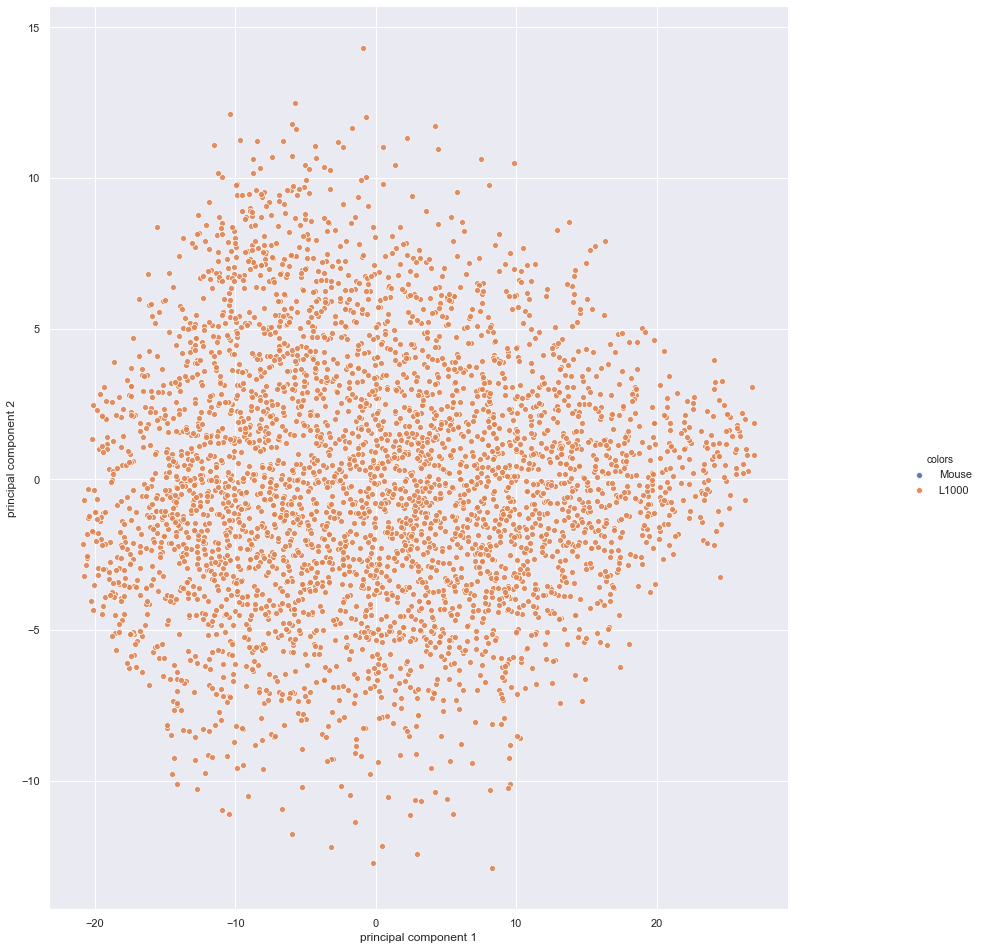

In [76]:
pca_DMSO = PCA(n_components=2)
principalComponents_DMSO = pca_DMSO.fit_transform(Big_data.transpose())
principalComponents_DMSO = pd.DataFrame(data = principalComponents_DMSO
             , columns = ['principal component 1', 'principal component 2'])


groups=principalComponents_DMSO
x= ["L1000"]*(len(list(Big_data.columns))-1)
x.insert(0,"Mouse")
groups["colors"]=x

g=sns.pairplot(x_vars= 'principal component 1',
             y_vars='principal component 2',
             data=groups, hue="colors" , height=5, plot_kws={'alpha':0.9})
g.fig.set_size_inches(15,15)


# t-SNE

In [77]:
import sklearn

from sklearn.manifold import TSNE
import time

In [78]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
df_subset=Big_data.transpose()
tsne_results = tsne.fit_transform(df_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

groups=principalComponents_DMSO
xx= ["L1000"]*(len(list(Big_data.columns))-1)
xx.insert(0,"Mouse")
df_subset["colors"]=x


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3912 samples in 0.099s...
[t-SNE] Computed neighbors for 3912 samples in 28.847s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3912
[t-SNE] Computed conditional probabilities for sample 2000 / 3912
[t-SNE] Computed conditional probabilities for sample 3000 / 3912
[t-SNE] Computed conditional probabilities for sample 3912 / 3912
[t-SNE] Mean sigma: 7.734976
[t-SNE] KL divergence after 250 iterations with early exaggeration: 134.324753
[t-SNE] KL divergence after 300 iterations: 6.071712
t-SNE done! Time elapsed: 41.980122089385986 seconds


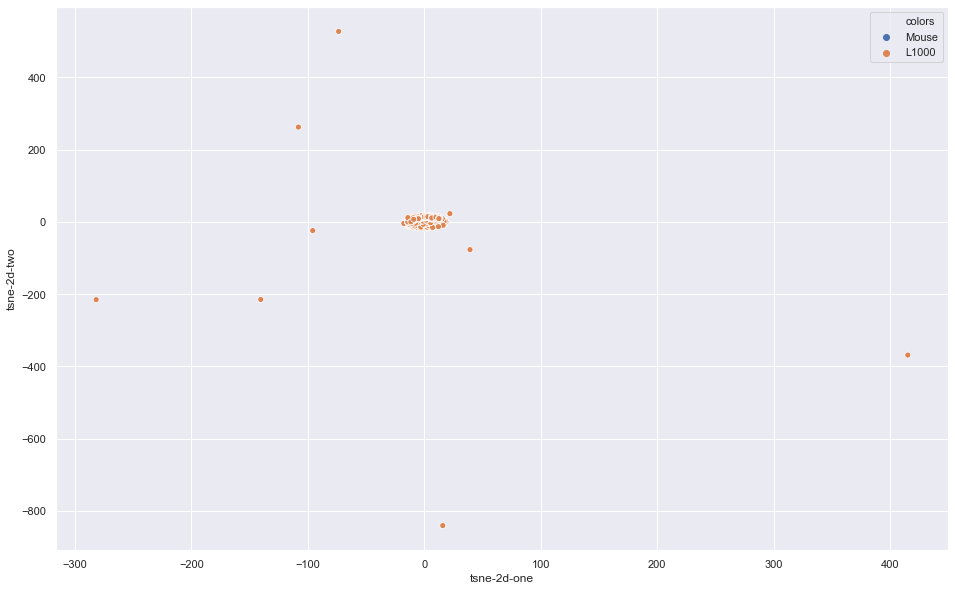

In [79]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="colors",
    #palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=1
)

In [80]:
tsne_results.shape

(3912, 2)

In [81]:
#Big_data=Big_data_temp

# Distance and correlation

In [82]:
Big_data_temp=Big_data.transpose()
#Big_data=Big_data.transpose()

In [83]:
from sklearn.neighbors import DistanceMetric 
dist = DistanceMetric.get_metric('euclidean')
x=[list(Big_data.iloc[0]),list(Big_data.iloc[1])]
dist.pairwise(x)

array([[ 0.        , 73.91887445],
       [73.91887445,  0.        ]])

In [84]:
from scipy.spatial.distance import pdist
#pdist(Big_data.iloc[list(range(Big_data.shape[0]))])

from scipy.spatial.distance import squareform

dist_sqr= squareform(pdist(Big_data_temp.iloc[list(range(Big_data_temp.shape[0]))]))


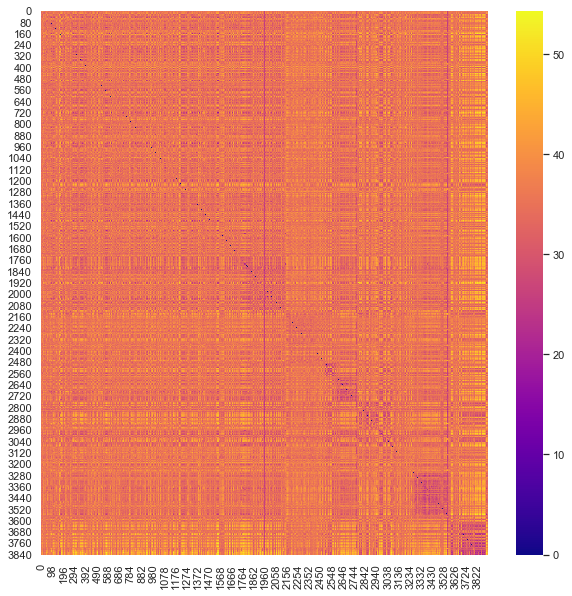

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.figure(figsize=(10,10))

sns.heatmap(dist_sqr, cmap='plasma')


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          4.,   3.,   1.,   3.,   2.,   1.,  11.,  56., 205., 480., 797.,
        929., 703., 416., 224.,  66.,  10.]),
 array([ 0.        ,  0.8908423 ,  1.7816846 ,  2.67252689,  3.56336919,
         4.45421149,  5.34505379,  6.23589609,  7.12673838,  8.01758068,
         8.90842298,  9.79926528, 10.69010758, 11.58094987, 12.47179217,
        13.36263447, 14.25347677, 15.14431907, 16.03516136, 16.92600366,
        17.81684596, 18.70768826, 19.59853056, 20.48937286, 21.38021515,
        22.27105745, 23.16189975, 24.05274205, 24.94358435, 25.83442664,
        26.72526894, 27.61611124, 28.50695354, 29.39779584, 30.28863813,
        31.17948043, 32.07032273, 32.96116503, 33.85200733, 34.74284962,
        35.63369192, 36.52453422, 37.41537652, 38.30621882, 39.19706111,
 

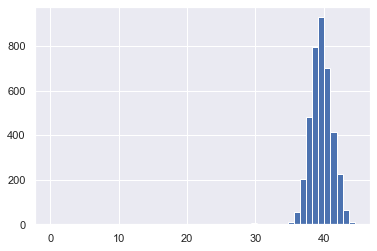

In [101]:
plt.hist(dist_sqr[0],bins=50)

In [87]:
sum(dist_sqr[0]<35)

17

closest samples

In [88]:
closest=dist_sqr[0]<35

In [89]:
len(closest)

3912

In [90]:
closest_samples=list(Big_data.columns[closest])

In [91]:
Counter(HA1E_ids_info.loc[closest_samples]["pert_iname"])

/home/ros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


Counter({nan: 1, 'DMSO': 13, 'nifedipine': 1, 'UnTrt': 1, 'methapyrilene': 1})

In [92]:
HA1E_ids_info.loc[closest_samples]

/home/ros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,pert_id,pert_iname,pert_type,cell_id,pert_dose,pert_dose_unit,pert_idose,pert_time,pert_time_unit,pert_itime,distil_id,dish_name
sig_id,,,,,,,,,,,,
MOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CPC001_HA1E_24H:DMSO:-666,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24.0,h,24 h,CPC001_HA1E_24H_X1_B3_DUO52HI53LO:A17|CPC001_H...,CPC001
CPC002_HA1E_24H:DMSO:-666,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24.0,h,24 h,CPC002_HA1E_24H_X1_B3_DUO52HI53LO:B17|CPC002_H...,CPC002
CPC003_HA1E_24H:DMSO:-666,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24.0,h,24 h,CPC003_HA1E_24H_X1_B3_DUO52HI53LO:B17|CPC003_H...,CPC003
CPC004_HA1E_24H:DMSO:-666,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24.0,h,24 h,CPC004_HA1E_24H_X1_B3_DUO52HI53LO:B17|CPC004_H...,CPC004
CPC005_HA1E_24H:DMSO:-666,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24.0,h,24 h,CPC005_HA1E_24H_X1_B3_DUO52HI53LO:A17|CPC005_H...,CPC005
CPC006_HA1E_24H:BRD-K96354014-001-09-6:10,BRD-K96354014,nifedipine,trt_cp,HA1E,10,µM,10 µM,24.0,h,24 h,CPC006_HA1E_24H_X1.A2_B4_DUO52HI53LO:L13|CPC00...,CPC006
CPC006_HA1E_24H:DMSO:-666,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24.0,h,24 h,CPC006_HA1E_24H_X1.A2_B4_DUO52HI53LO:A17|CPC00...,CPC006
CPC007_HA1E_24H:DMSO:-666,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24.0,h,24 h,CPC007_HA1E_24H_X1_B3_DUO52HI53LO:E01|CPC007_H...,CPC007


In [93]:
ss1=HA1E_ids_info.loc[closest_samples].index[0]

/home/ros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [94]:
Big_data.iloc[:,0]

EGF        1
NFATC4    -1
HSPB1     -1
STAT3     -1
PROS1     -1
          ..
ITIH4     -1
UNC5B     -1
DENND2A   -1
CALHM2    -1
PKNOX2    -1
Name: MOUSE, Length: 909, dtype: int64

In [95]:
Big_data[ss1]

EGF        1
NFATC4    -1
HSPB1     -1
STAT3     -1
PROS1     -1
          ..
ITIH4     -1
UNC5B     -1
DENND2A   -1
CALHM2    -1
PKNOX2    -1
Name: MOUSE, Length: 909, dtype: int64

In [96]:
from scipy.stats import pearsonr
pearsonr(Big_data.iloc[:,0], Big_data[ss1])

(1.0, 0.0)

In [97]:
all_corr=Big_data.corr()

/home/ros/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ros/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  2.,   2.,   6.,   3.,  20.,  26.,  48.,  64.,  89.,  84., 105.,
        143., 136., 164., 217., 176., 205., 215., 225., 217., 232., 251.,
        242., 217., 180., 167., 135., 116.,  77.,  58.,  36.,  31.,   9.,
          7.,   1.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-0.20831695, -0.19623378, -0.18415061, -0.17206745, -0.15998428,
        -0.14790111, -0.13581794, -0.12373477, -0.1116516 , -0.09956843,
        -0.08748526, -0.07540209, -0.06331892, -0.05123575, -0.03915258,
        -0.02706941, -0.01498624, -0.00290307,  0.0091801 ,  0.02126327,
         0.03334644,  0.04

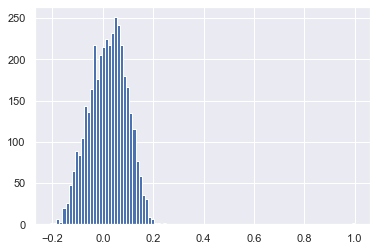

In [98]:
plt.hist(all_corr.iloc[0],bins=100)

In [99]:
closest_samples=Big_data.columns[(all_corr.iloc[0]>0.18)]
HA1E_ids_info.loc[closest_samples]

/home/ros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


,pert_id,pert_iname,pert_type,cell_id,pert_dose,pert_dose_unit,pert_idose,pert_time,pert_time_unit,pert_itime,distil_id,dish_name
MOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CPC005_HA1E_24H:BRD-K50841342-001-01-6:10,BRD-K50841342,PAC-1,trt_cp,HA1E,10,µM,10 µM,24.0,h,24 h,CPC005_HA1E_24H_X1_B3_DUO52HI53LO:H19|CPC005_H...,CPC005
CPC005_HA1E_24H:BRD-K69023402-001-02-5:10,BRD-K69023402,thapsigargin,trt_cp,HA1E,10,µM,10 µM,24.0,h,24 h,CPC005_HA1E_24H_X1_B3_DUO52HI53LO:L20|CPC005_H...,CPC005
CPC004_HA1E_24H:BRD-K99621550-003-03-4:10,BRD-K99621550,tubocurarine,trt_cp,HA1E,10,µM,10 µM,24.0,h,24 h,CPC004_HA1E_24H_X1_B3_DUO52HI53LO:I18|CPC004_H...,CPC004
CPC003_HA1E_24H:BRD-A19037878:10,BRD-A19037878,trichostatin-a,trt_cp,HA1E,10,µM,10 µM,24.0,h,24 h,CPC003_HA1E_24H_X1_B3_DUO52HI53LO:B03|CPC003_H...,CPC003
CPC006_HA1E_24H:BRD-K77947974-001-05-6:4.21,BRD-K77947974,fluspirilene,trt_cp,HA1E,4.21,µM,5 µM,24.0,h,24 h,CPC006_HA1E_24H_X1.A2_B4_DUO52HI53LO:C24|CPC00...,CPC006
CPC006_HA1E_24H:BRD-K69328504-001-01-7:10,BRD-K69328504,L-690488,trt_cp,HA1E,10,µM,10 µM,24.0,h,24 h,CPC006_HA1E_24H_X1.A2_B4_DUO52HI53LO:O01|CPC00...,CPC006
CPC007_HA1E_24H:BRD-K75644678-001-03-5:10,BRD-K75644678,BRD-K75644678,trt_cp,HA1E,10,µM,10 µM,24.0,h,24 h,CPC007_HA1E_24H_X1_B3_DUO52HI53LO:B14|CPC007_H...,CPC007
HDAC002_HA1E_24H:BRD-K26510616-001-01-7:0.3125,BRD-K26510616,BRD-K26510616,trt_cp,HA1E,0.3125,µM,500 nM,24.0,h,24 h,HDAC002_HA1E_24H_X1_B7_DUO52HI53LO:C09|HDAC002...,HDAC002
HDAC002_HA1E_24H:BRD-K02130563-001-05-6:0.3125,BRD-K02130563,panobinostat,trt_cp,HA1E,0.3125,µM,500 nM,24.0,h,24 h,HDAC002_HA1E_24H_X1_B7_DUO52HI53LO:N24|HDAC002...,HDAC002


In [100]:
closest_samples=Big_data.columns[(all_corr.iloc[0]<(-1* 0.18))]
HA1E_ids_info.loc[closest_samples]

,pert_id,pert_iname,pert_type,cell_id,pert_dose,pert_dose_unit,pert_idose,pert_time,pert_time_unit,pert_itime,distil_id,dish_name
CPC002_HA1E_24H:BRD-K08547377-003-03-2:10,BRD-K08547377,irinotecan,trt_cp,HA1E,10,µM,10 µM,24,h,24 h,CPC002_HA1E_24H_X1_B3_DUO52HI53LO:J19|CPC002_H...,CPC002
CPC002_HA1E_24H:BRD-K26241953-001-01-0:10,BRD-K26241953,piceatannol,trt_cp,HA1E,10,µM,10 µM,24,h,24 h,CPC002_HA1E_24H_X1_B3_DUO52HI53LO:G16|CPC002_H...,CPC002
CPC005_HA1E_24H:BRD-K79905821-004-02-8:10,BRD-K79905821,gabazine,trt_cp,HA1E,10,µM,10 µM,24,h,24 h,CPC005_HA1E_24H_X1_B3_DUO52HI53LO:F10|CPC005_H...,CPC005
CPC007_HA1E_24H:BRD-K23935793-001-06-3:10,BRD-K23935793,BRD-K23935793,trt_cp,HA1E,10,µM,10 µM,24,h,24 h,CPC007_HA1E_24H_X1_B3_DUO52HI53LO:E09|CPC007_H...,CPC007
CPC003_HA1E_24H:B18,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC003_HA1E_24H_X2_B3_DUO52HI53LO:B18|CPC003_H...,CPC003
PCLB003_HA1E_24H:BRD-K42573370-001-01-1:1.11,BRD-K42573370,avrainvillamide-analog-2,trt_cp,HA1E,1.11,µM,1.11 µM,24,h,24 h,PCLB003_HA1E_24H_X1_B13:B15|PCLB003_HA1E_24H_X...,PCLB003
